<a href="https://colab.research.google.com/github/nn-hoang/Analysis_projects/blob/main/Brazilian_E_Commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **How to optimise review score for new sellers on Olist**

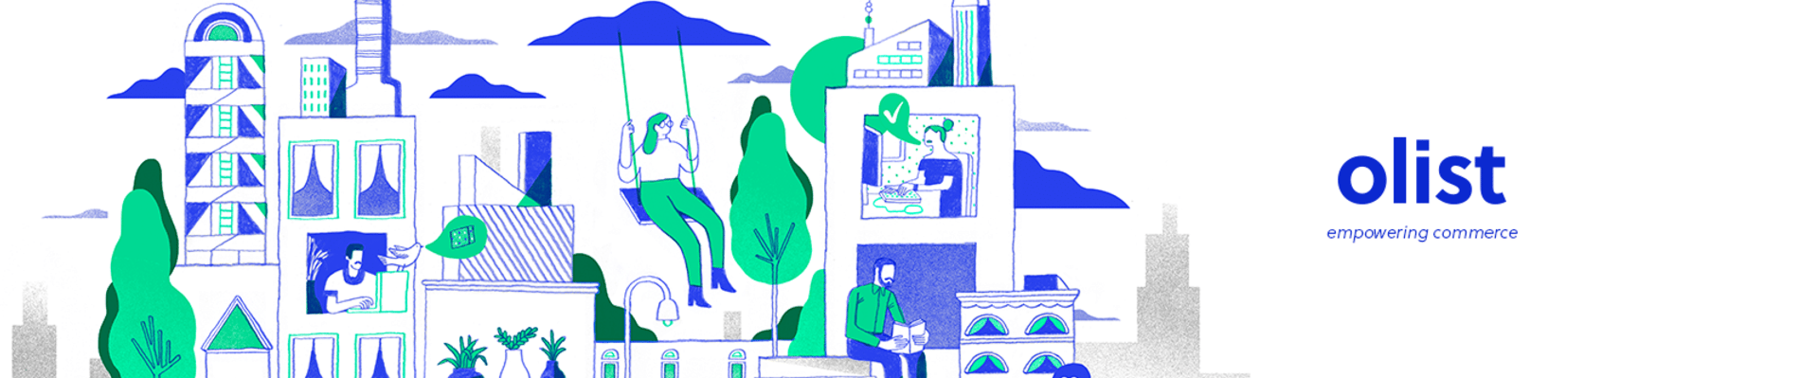

# 1 INTRODUCTION

##**1.1 Overview**

About Dataset
Brazilian E-Commerce Public Dataset by Olist
Welcome! This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.

This dataset was generously provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners. See more on our website: www.olist.com

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

**Attention**

An order might have multiple items.

Each item might be fulfilled by a distinct seller.

All text identifying stores and partners where replaced by the names of Game of Thrones great houses.

## **1.2 Introduction**



**Key audience: the sellers of Olist who are new on the e-market**

Key question: 

Question 1: Is the rating score related to order lead time?

Question 2: Does late delivery affect customer rating score?

Question 3: What does time affect customer experience? 




## **1.3 Key Findings**

Question 1: The rating score is related to Order Lead Time. Especially actual delivery time, 5-star group has 4 days delivery less than lower group. 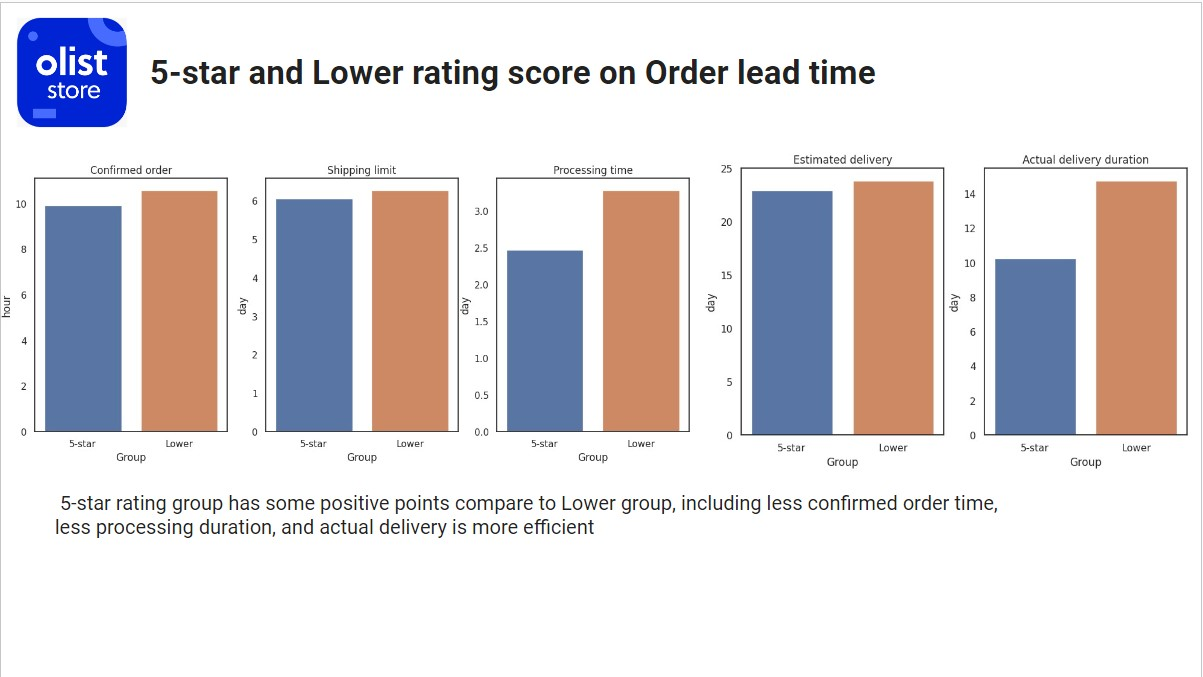

Question 2: Nearly 78% of lower group occupied in Late delivery. Sellers should deliver orders on time or no later than one day to get at least 4 out of 5 review score. 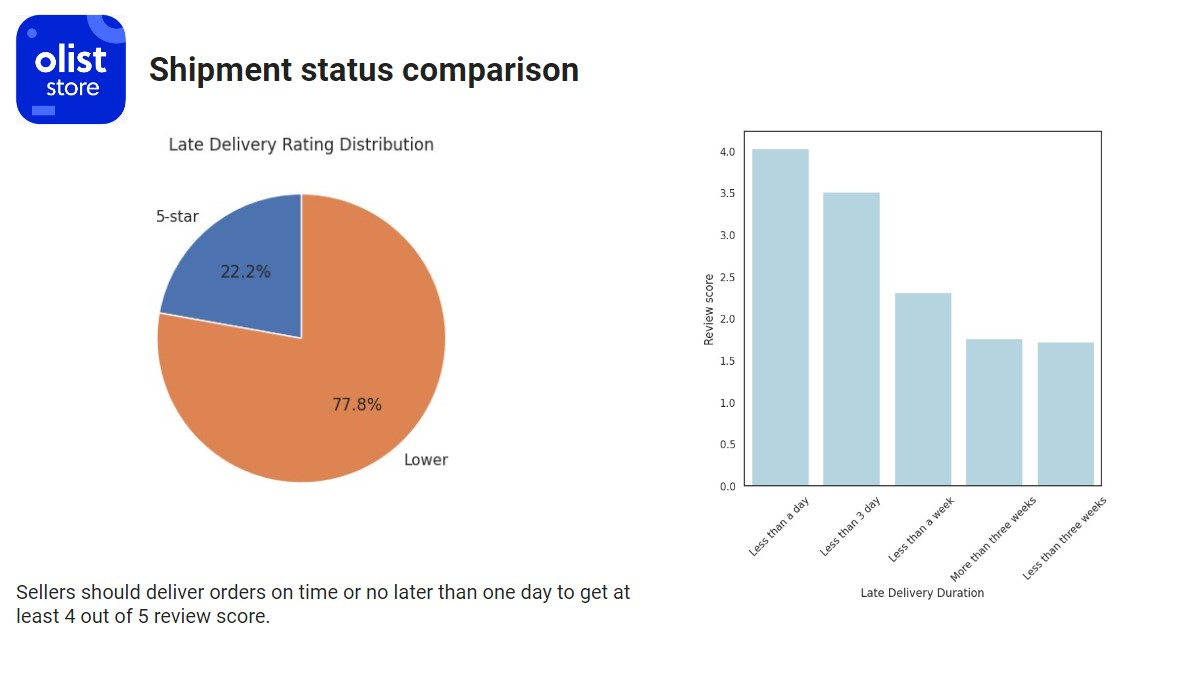

Question 3: Number of orders were higher on Weekdays and reduced at weekends. The number of lower rating score increased when the volume of order increased. Besides that the number of late delivery also raised during this period. Therefore, Olist have to improve their system during busy period. 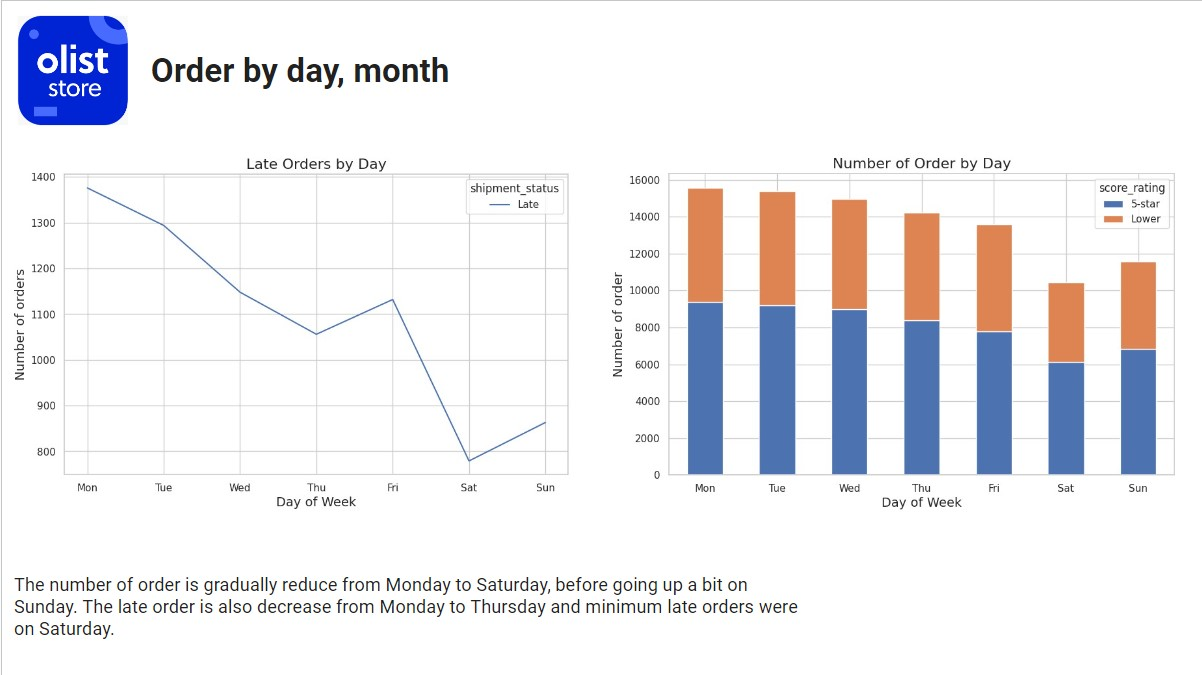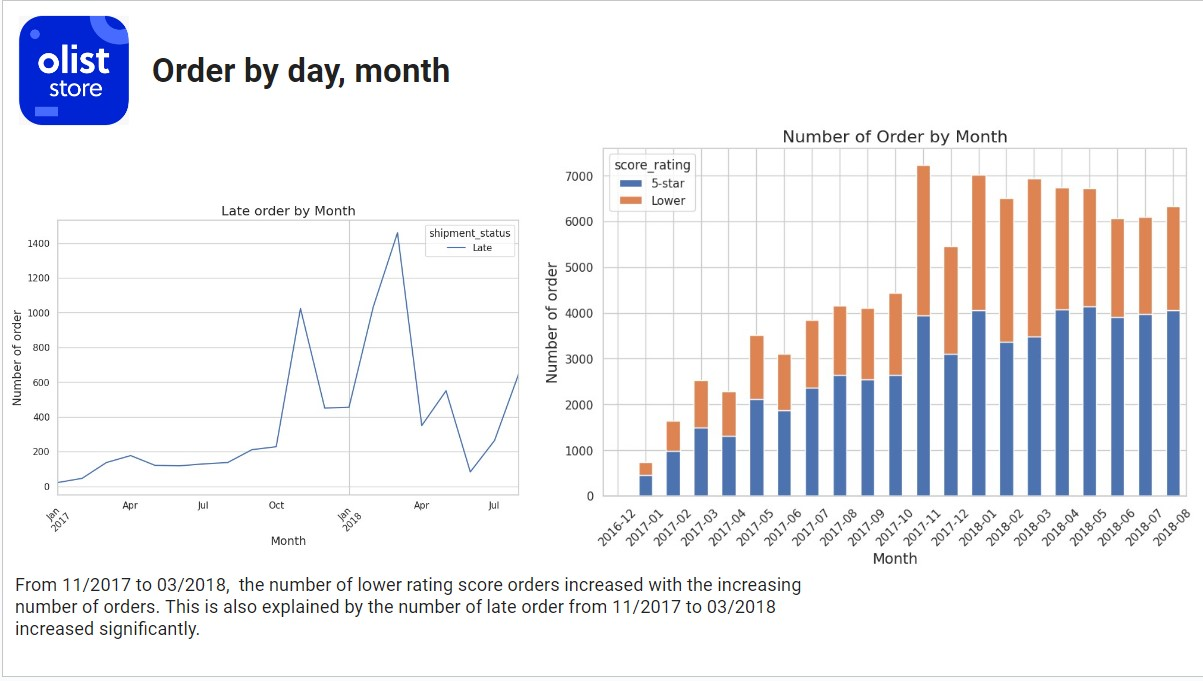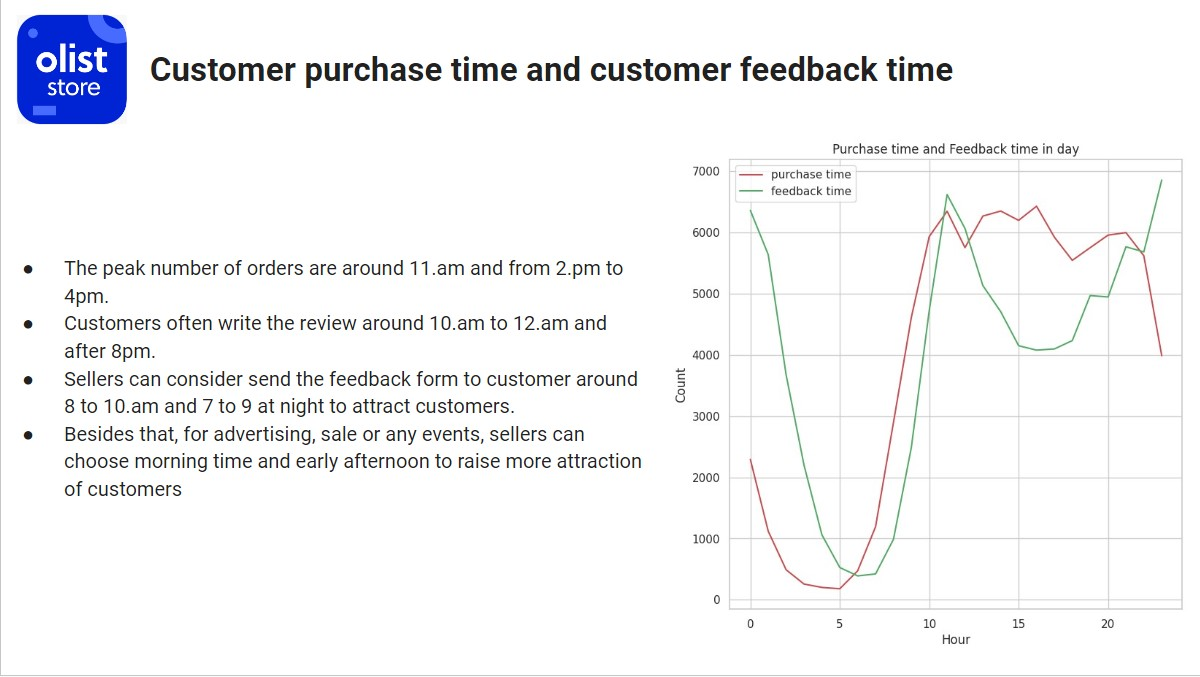

# 2  PRE-PROCESS DATA

## **2.1 Import Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# NLTK tools for text processing
import re, nltk
nltk.download("stopwords")
nltk.download('punkt')
from nltk import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer



customers = pd.read_csv ("/content/gdrive/MyDrive/DataScience Final Project/olist_customers_dataset.csv")
geolocation = pd.read_csv ("/content/gdrive/MyDrive/DataScience Final Project/olist_geolocation_dataset.csv")
order_items= pd.read_csv ("/content/gdrive/MyDrive/DataScience Final Project/olist_order_items_dataset.csv")
order_payments = pd.read_csv ("/content/gdrive/MyDrive/DataScience Final Project/olist_order_payments_dataset.csv")
reviews = pd.read_csv ("/content/gdrive/MyDrive/DataScience Final Project/olist_order_reviews_dataset.csv")
orders = pd.read_csv ("/content/gdrive/MyDrive/DataScience Final Project/olist_orders_dataset.csv")
products = pd.read_csv ("/content/gdrive/MyDrive/DataScience Final Project/olist_products_dataset.csv")
sellers = pd.read_csv ("/content/gdrive/MyDrive/DataScience Final Project/olist_sellers_dataset.csv")
product_category_translation = pd.read_csv("/content/gdrive/MyDrive/DataScience Final Project/product_category_name_translation.csv")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
!pip install google_trans_new # Installing the translate API
import google_trans_new # Importing the package
print(google_trans_new.LANGUAGES) # Checking the list of languages that are supported

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
{'af': 'afrikaans', 'sq': 'albanian', 'am': 'amharic', 'ar': 'arabic', 'hy': 'armenian', 'az': 'azerbaijani', 'eu': 'basque', 'be': 'belarusian', 'bn': 'bengali', 'bs': 'bosnian', 'bg': 'bulgarian', 'ca': 'catalan', 'ceb': 'cebuano', 'ny': 'chichewa', 'zh-cn': 'chinese (simplified)', 'zh-tw': 'chinese (traditional)', 'co': 'corsican', 'hr': 'croatian', 'cs': 'czech', 'da': 'danish', 'nl': 'dutch', 'en': 'english', 'eo': 'esperanto', 'et': 'estonian', 'tl': 'filipino', 'fi': 'finnish', 'fr': 'french', 'fy': 'frisian', 'gl': 'galician', 'ka': 'georgian', 'de': 'german', 'el': 'greek', 'gu': 'gujarati', 'ht': 'haitian creole', 'ha': 'hausa', 'haw': 'hawaiian', 'iw': 'hebrew', 'he': 'hebrew', 'hi': 'hindi', 'hmn': 'hmong', 'hu': 'hungarian', 'is': 'icelandic', 'ig': 'igbo', 'id': 'indonesian', 'ga': 'irish', 'it': 'italian', 'ja': 'japanese', 'jw': 'javanese', 'kn': 'kannada', 'kk': 'kazakh',

##**2.2 Clean Datasets**

ORDER TABLE

In [ ]:
orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
#Check the status of the orders 
orders.order_status.value_counts()/orders.shape[0]

delivered      0.970203
shipped        0.011132
canceled       0.006285
unavailable    0.006124
invoiced       0.003158
processing     0.003027
created        0.000050
approved       0.000020
Name: order_status, dtype: float64

As we can see 97% of orders delivered, this makes sense because the dataset is from 2016 to 2018. In terms of this project, we will focus on delivered orders only. 

In [ ]:
# Select delivered orders only
delivered_order = orders[orders["order_status"]=="delivered"]

In [ ]:
delivered_order.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

In [ ]:
#Fill NULL order_approved_at with order_purchase_timestamp
delivered_order.loc[delivered_order["order_approved_at"].isna(),"order_approved_at"] = delivered_order["order_purchase_timestamp"] 

In [ ]:
#Fill NULL order_delivered_carrier_date with order_approved_at 
delivered_order.loc[delivered_order["order_delivered_carrier_date"].isna(),"order_delivered_carrier_date"] = delivered_order["order_approved_at"]

In [ ]:
#Fill NULL order_delivered_customer_date with order_estimated_delivery_date
delivered_order.loc[delivered_order["order_delivered_customer_date"].isna(),"order_delivered_customer_date"] = delivered_order["order_estimated_delivery_date"]

In [ ]:
delivered_order.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [ ]:
#Drop duplicates if any
delivered_order.drop_duplicates(inplace=True)

PRODUCT TABLE

In [ ]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
# we do not use these columns("product_name_lenght","product_description_lenght","product_photos_qty"), therefore we will drop these columns later. We  just drop 2 observations with Nan product's dimension
products.dropna(subset="product_weight_g", axis=0, inplace=True)

In [ ]:
products.isna().sum()

product_id                      0
product_category_name         609
product_name_lenght           609
product_description_lenght    609
product_photos_qty            609
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
dtype: int64

In [ ]:
#drop duplicates if any
products.duplicated().sum()

0

CUSTOMER TABLE


In [ ]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
customers.duplicated().sum()

0

ORDER ITEM TABLE


In [ ]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [ ]:
order_items.duplicated().sum()

0

ORDER PAYMENT TABLE

In [ ]:
order_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [ ]:
order_payments.duplicated().sum()

0

SELLERS TABLE

In [ ]:
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [ ]:
sellers.duplicated().sum()

0

MERGE THE TABLES TO CREATE A FINAL TABLE FOR ANALYSIS

In [ ]:
# merge order with order items on "order_id"
delivered_order = delivered_order.merge(order_items, on="order_id", how="left")

In [ ]:
delivered_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 110196
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110197 non-null  object 
 1   customer_id                    110197 non-null  object 
 2   order_status                   110197 non-null  object 
 3   order_purchase_timestamp       110197 non-null  object 
 4   order_approved_at              110197 non-null  object 
 5   order_delivered_carrier_date   110197 non-null  object 
 6   order_delivered_customer_date  110197 non-null  object 
 7   order_estimated_delivery_date  110197 non-null  object 
 8   order_item_id                  110197 non-null  int64  
 9   product_id                     110197 non-null  object 
 10  seller_id                      110197 non-null  object 
 11  shipping_limit_date            110197 non-null  object 
 12  price                         

In [ ]:
# merge order with item_number 
#delivered_order = delivered_order.merge(order_items, on="order_id", how="left")

In [ ]:
# merge order with products on "product_id"
delivered_order = delivered_order.merge(products, on="product_id", how ="left")

In [ ]:
delivered_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 110196
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110197 non-null  object 
 1   customer_id                    110197 non-null  object 
 2   order_status                   110197 non-null  object 
 3   order_purchase_timestamp       110197 non-null  object 
 4   order_approved_at              110197 non-null  object 
 5   order_delivered_carrier_date   110197 non-null  object 
 6   order_delivered_customer_date  110197 non-null  object 
 7   order_estimated_delivery_date  110197 non-null  object 
 8   order_item_id                  110197 non-null  int64  
 9   product_id                     110197 non-null  object 
 10  seller_id                      110197 non-null  object 
 11  shipping_limit_date            110197 non-null  object 
 12  price                         

In [ ]:
# merge order with seller on "seller_id"
delivered_order = delivered_order.merge(sellers, on ="seller_id", how ="left")

In [ ]:
delivered_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 110196
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110197 non-null  object 
 1   customer_id                    110197 non-null  object 
 2   order_status                   110197 non-null  object 
 3   order_purchase_timestamp       110197 non-null  object 
 4   order_approved_at              110197 non-null  object 
 5   order_delivered_carrier_date   110197 non-null  object 
 6   order_delivered_customer_date  110197 non-null  object 
 7   order_estimated_delivery_date  110197 non-null  object 
 8   order_item_id                  110197 non-null  int64  
 9   product_id                     110197 non-null  object 
 10  seller_id                      110197 non-null  object 
 11  shipping_limit_date            110197 non-null  object 
 12  price                         

In [ ]:
# merge with reviews. Before merging with review table we have to drop "order_id" duplicates 
reviews[reviews.duplicated(subset="order_id")]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1119,46abf3ea0b2710ad41390fdb79c32d84,5040757d4e06a4be96d3827b860b4e7c,5,NaN,NaN,2017-11-07 00:00:00,2017-11-10 20:07:48
3109,aa193e76d35950c4ae988237bb36ed2b,cf73e2cb1f4a9480ed70c154da3d954a,5,NaN,NaN,2018-01-18 00:00:00,2018-01-18 17:36:45
8108,40294ea5a778dc62080d6b3f55d361ce,e1bc1083cd7acd30d0576335373b907d,5,NaN,NaN,2018-03-23 00:00:00,2018-03-24 00:23:06
9064,32e2c7e889f7a185d462265398ee3631,c7cfea0c153e6382e32e84c2a9dd7d2e,5,NaN,NaN,2017-10-21 00:00:00,2017-10-22 00:47:25
9795,95a3135743556b117d888cc8c6e12e11,f9c78e6e58306dc81efbbada1ac11f24,3,NaN,O produto chegou antes do prazo mas recebi um ...,2017-09-14 00:00:00,2017-09-17 11:14:08
...,...,...,...,...,...,...,...
98989,dfb3db02188d809d5cd199496b6da87e,c0db7d31ace61fc360a3eaa34dd3457c,5,NaN,NaN,2018-02-17 00:00:00,2018-02-19 19:29:19
99108,2c6c08892b83ba4c1be33037c2842294,42ae1967f68c90bb325783ac55d761ce,4,NaN,"Chegou um pouco amassada, mas nada de mais, e ...",2017-07-03 00:00:00,2017-07-05 19:06:59
99164,2afe63a67dfd99b3038f568fb47ee761,c5334d330e36d2a810a7a13c72e135ee,5,NaN,"Muito bom, produto conforme anunciado, entrega...",2018-03-03 00:00:00,2018-03-04 22:56:47
99178,44d1e9165ec54b1d89d33594856af859,a7dbcf5043158d6fa72859eead2f3d10,4,NaN,NaN,2017-05-24 00:00:00,2017-05-24 23:15:21


In [ ]:
reviews = reviews.drop_duplicates(subset=["order_id"], keep="first")

In [ ]:
delivered_order = delivered_order.merge(reviews, on="order_id", how="left")

In [ ]:
delivered_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 110196
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110197 non-null  object 
 1   customer_id                    110197 non-null  object 
 2   order_status                   110197 non-null  object 
 3   order_purchase_timestamp       110197 non-null  object 
 4   order_approved_at              110197 non-null  object 
 5   order_delivered_carrier_date   110197 non-null  object 
 6   order_delivered_customer_date  110197 non-null  object 
 7   order_estimated_delivery_date  110197 non-null  object 
 8   order_item_id                  110197 non-null  int64  
 9   product_id                     110197 non-null  object 
 10  seller_id                      110197 non-null  object 
 11  shipping_limit_date            110197 non-null  object 
 12  price                         

In [ ]:
# merge order with Order Payment on "order_id"

In [ ]:
order_payments[order_payments.duplicated(subset="order_id")]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
1456,683bf306149bb869980b68d48a1bd6ab,1,credit_card,1,8.58
2324,e6a66a8350bb88497954d37688ab123e,2,voucher,1,10.51
2393,8e5148bee82a7e42c5f9ba76161dc51a,1,credit_card,1,0.67
2414,816ccd9d21435796e8ffa9802b2a782f,1,credit_card,1,5.65
2497,2cbcb371aee438c59b722a21d83597e0,2,voucher,1,7.80
...,...,...,...,...,...
103778,fd86c80924b4be8fb7f58c4ecc680dae,1,credit_card,1,76.10
103817,6d4616de4341417e17978fe57aec1c46,1,credit_card,1,19.18
103860,31bc09fdbd701a7a4f9b55b5955b8687,6,voucher,1,77.99
103869,c9b01bef18eb84888f0fd071b8413b38,1,credit_card,6,238.16


In [ ]:
order_payments = order_payments.drop_duplicates(subset="order_id", keep = "first")

In [ ]:
delivered_order = delivered_order.merge(order_payments, on="order_id", how ="left")

In [ ]:
delivered_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 110196
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110197 non-null  object 
 1   customer_id                    110197 non-null  object 
 2   order_status                   110197 non-null  object 
 3   order_purchase_timestamp       110197 non-null  object 
 4   order_approved_at              110197 non-null  object 
 5   order_delivered_carrier_date   110197 non-null  object 
 6   order_delivered_customer_date  110197 non-null  object 
 7   order_estimated_delivery_date  110197 non-null  object 
 8   order_item_id                  110197 non-null  int64  
 9   product_id                     110197 non-null  object 
 10  seller_id                      110197 non-null  object 
 11  shipping_limit_date            110197 non-null  object 
 12  price                         

In [ ]:
# merge order with cusomter on "customer_id"
delivered_order = delivered_order.merge(customers, on ="customer_id", how="left")

Merge with Geolocation Table

In [ ]:
geolocation.head(5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
geolocation.geolocation_zip_code_prefix.nunique()

19015

In [ ]:
delivered_order.customer_zip_code_prefix.nunique()

14889

In [ ]:
# Geolocation has different lat/long with the same prefix, therefore we use the average lat/long
geolocation_avg = geolocation.groupby("geolocation_zip_code_prefix")[["geolocation_lat","geolocation_lng"]].mean().reset_index()

In [ ]:
#Modify the location tables before joining
sellers_location = geolocation_avg.copy()
sellers_location.columns = ("seller_zip_code_prefix","seller_lat","seller_long")
customers_location = geolocation_avg.copy()
customers_location.columns = ("customer_zip_code_prefix","customer_lat","customer_long")

In [ ]:
sellers_location

,seller_zip_code_prefix,seller_lat,seller_long
0,1001,-23.550190,-46.634024
1,1002,-23.548146,-46.634979
2,1003,-23.548994,-46.635731
3,1004,-23.549799,-46.634757
4,1005,-23.549456,-46.636733
...,...,...,...
19010,99960,-27.953722,-52.025511
19011,99965,-28.183372,-52.039850
19012,99970,-28.343766,-51.874689
19013,99980,-28.389129,-51.843836


In [ ]:
#Merge order table with the location tables
delivered_order = delivered_order.merge(sellers_location, on = "seller_zip_code_prefix", how = "left")
delivered_order = delivered_order.merge(customers_location, on = "customer_zip_code_prefix", how = "left")

In [ ]:
delivered_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 110196
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110197 non-null  object 
 1   customer_id                    110197 non-null  object 
 2   order_status                   110197 non-null  object 
 3   order_purchase_timestamp       110197 non-null  object 
 4   order_approved_at              110197 non-null  object 
 5   order_delivered_carrier_date   110197 non-null  object 
 6   order_delivered_customer_date  110197 non-null  object 
 7   order_estimated_delivery_date  110197 non-null  object 
 8   order_item_id                  110197 non-null  int64  
 9   product_id                     110197 non-null  object 
 10  seller_id                      110197 non-null  object 
 11  shipping_limit_date            110197 non-null  object 
 12  price                         

There are some missing values in the seller and customer lat/long because some prefixes in sellers and customers table are not in geolocation table. So we will fill in these missing values using the lat/long of city column.

In [ ]:
geolocation_city_agg  = geolocation.groupby("geolocation_city")[["geolocation_lat","geolocation_lng"]].mean().reset_index()
geolocation_city_agg.columns = ["city","lat","long"]
geolocation_city_agg = geolocation_city_agg.set_index('city')
city_list = geolocation_city_agg.index.tolist()

In [ ]:
#Filter out the rows that city's name is not in the above list
delivered_order = delivered_order[(delivered_order['customer_lat'].notnull())|(delivered_order['customer_city'].isin(city_list))]

In [ ]:
#Fill in the NULL value in seller & customer's long & lat using the location_city_agg table
delivered_order.loc[delivered_order['seller_lat'].isna(), 'seller_lat'] = delivered_order.loc[delivered_order['seller_lat'].isna(), 'seller_city'].apply(lambda x: geolocation_city_agg.lat[x])
delivered_order.loc[delivered_order["seller_long"].isna(), "seller_long"] = delivered_order.loc[delivered_order["seller_long"].isna(), "seller_city"].apply(lambda x: geolocation_city_agg.long[x])
delivered_order.loc[delivered_order["customer_lat"].isna(), "customer_lat"] = delivered_order.loc[delivered_order["customer_long"].isna(), "customer_city"].apply(lambda x: geolocation_city_agg.long[x])
delivered_order.loc[delivered_order["customer_long"].isna(), "customer_long"] = delivered_order.loc[delivered_order["customer_long"].isna(), "customer_city"].apply(lambda x: geolocation_city_agg.long[x])

In [ ]:
# Calculate the distance between sellers and customers
from geopy.distance  import distance

def distance_calcuate(row):
  coords_1 = (row.seller_lat, row.seller_long)
  coords_2 = (row.customer_lat, row.customer_long)
  return distance(coords_1, coords_2).km



In [ ]:
delivered_order["shipping_distance"] = delivered_order.apply(distance_calcuate, axis =1)

Product Category Name

In [ ]:
delivered_order = delivered_order.merge(product_category_translation, on ="product_category_name", how ="left")

In [ ]:
delivered_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110151 entries, 0 to 110150
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110151 non-null  object 
 1   customer_id                    110151 non-null  object 
 2   order_status                   110151 non-null  object 
 3   order_purchase_timestamp       110151 non-null  object 
 4   order_approved_at              110151 non-null  object 
 5   order_delivered_carrier_date   110151 non-null  object 
 6   order_delivered_customer_date  110151 non-null  object 
 7   order_estimated_delivery_date  110151 non-null  object 
 8   order_item_id                  110151 non-null  int64  
 9   product_id                     110151 non-null  object 
 10  seller_id                      110151 non-null  object 
 11  shipping_limit_date            110151 non-null  object 
 12  price                         

In [ ]:
delivered_order["review_score"].isna().sum() 

827

<Axes: >

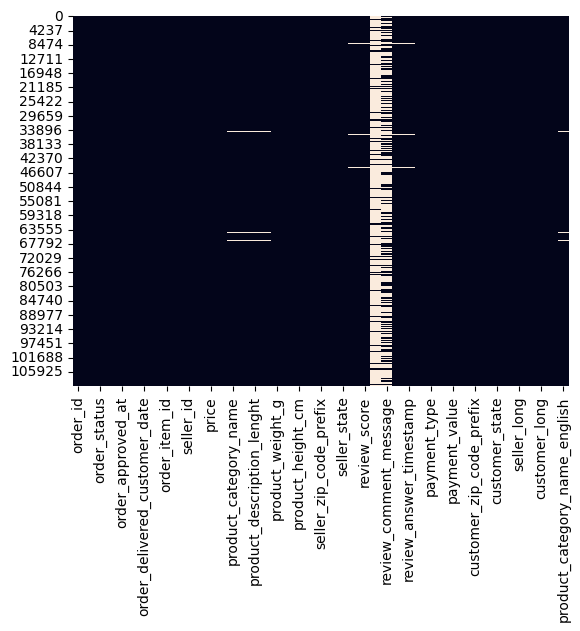

In [ ]:
#Visualize the distribution of nan_values
sns.heatmap(delivered_order.isna(), cbar=False)

In [ ]:
#Change the name of columns
delivered_order = delivered_order.rename(columns = {"order_purchase_timestamp": "purchase_time","order_approved_at":"approved_time","order_delivered_customer_date":"delivery_time",
                                                    "order_estimated_delivery_date": "estimated_delivery_time","product_category_name_english": "product_category",
                                                    "review_answer_timestamp": "review_time"})

In [ ]:
#Group data by related fields
order_group=["order_id",'purchase_time','approved_time', 'order_item_id',"shipping_limit_date",'order_delivered_carrier_date',
       'delivery_time', 'estimated_delivery_time','shipping_distance']
product_group=['product_id','price', 'freight_value', 'product_category',
        'product_weight_g', 'product_length_cm','product_height_cm', 'product_width_cm']
review_group = ["review_score", "review_comment_message","review_creation_date","review_time"]
seller_group = ['seller_id','seller_city', 'seller_zip_code_prefix','seller_state',"seller_lat","seller_long"]
customer_group = ['customer_id','customer_unique_id','customer_zip_code_prefix', 'customer_city', 'customer_state',"customer_lat","customer_long"]
payment = ['payment_sequential','payment_type','payment_installments','payment_value']

In [ ]:
delivered_order = delivered_order[order_group + product_group + review_group + seller_group + customer_group + payment]

In [ ]:
delivered_order.head(5)

,order_id,purchase_time,approved_time,order_item_id,shipping_limit_date,order_delivered_carrier_date,delivery_time,estimated_delivery_time,shipping_distance,product_id,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_long,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-02 11:07:15,1,2017-10-06 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,18.566632,87285b34884572647811a353c7ac498a,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.576983,-46.587161,1.0,credit_card,1.0,18.12
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-07-26 03:24:27,1,2018-07-30 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,847.437333,595fac2a385ac33a80bd5114aec74eb8,...,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12.177924,-44.660711,1.0,boleto,1.0,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-08 08:55:23,1,2018-08-13 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,512.100044,aa4383b373c6aca5d8797843e5594415,...,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,-16.745150,-48.514783,1.0,credit_card,3.0,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-11-18 19:45:59,1,2017-11-23 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1816.085655,d0b61bfb1de832b15ba9d266ca96e5b0,...,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,-5.774190,-35.271143,1.0,credit_card,1.0,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-13 22:20:29,1,2018-02-19 20:31:37,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,29.684401,65266b2da20d04dbe00c5c2d3bb7859e,...,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,-23.676370,-46.514627,1.0,credit_card,1.0,28.62


## **2.3 Update Datasets**

### **2.3.1 Update delivery duration**

In [ ]:
# Convert datetime columns to datetime datatype
time_columns=['purchase_time','approved_time',"shipping_limit_date",'order_delivered_carrier_date',
              'delivery_time', 'estimated_delivery_time',"review_creation_date","review_time"]
for i in time_columns:
  delivered_order[i] = pd.to_datetime(delivered_order[i])

In [ ]:
delivered_order["confirmed_order"]= delivered_order["approved_time"] - delivered_order["purchase_time"]
delivered_order["confirmed_order"] = delivered_order["confirmed_order"].dt.total_seconds() / (60 * 60)
delivered_order["shipping_limit"] = delivered_order["shipping_limit_date"] - delivered_order["approved_time"]
delivered_order["shipping_limit"] = delivered_order['shipping_limit'].dt.total_seconds() / (24 * 60 * 60)
delivered_order["processing_time"] = delivered_order["order_delivered_carrier_date"] - delivered_order["approved_time"]
delivered_order["processing_time"] = delivered_order['processing_time'].dt.total_seconds() / (24 * 60 * 60)
delivered_order["estimated_delivery"] = delivered_order["estimated_delivery_time"] - delivered_order["approved_time"]
delivered_order["estimated_delivery"] = delivered_order['estimated_delivery'].dt.total_seconds() / (24 * 60 * 60)
# Checking actual delivery duration from approved time to order delivered
delivered_order["actual_delivery"] = delivered_order["delivery_time"] - delivered_order["approved_time"]
delivered_order["actual_delivery"] = delivered_order['actual_delivery'].dt.total_seconds() / (24 * 60 * 60)
delivered_order["compared_with_estimate"] = delivered_order["delivery_time"] - delivered_order["estimated_delivery_time"]
delivered_order["delivery_diff"] = delivered_order['compared_with_estimate'].dt.total_seconds() / (24 * 60 * 60)
#send_survey : time lapsed after the customer received the product until the survey is created in the system
delivered_order["send_survey"] = delivered_order["review_creation_date"] - delivered_order["delivery_time"]
delivered_order["send_survey"] = delivered_order['send_survey'].dt.total_seconds() / (60 * 60)
#submit_review : time lapsed after the customer receive the review form until they submit the review
delivered_order["submit_review"] = delivered_order["review_time"] - delivered_order["review_creation_date"]
delivered_order["submit_review"] = delivered_order['submit_review'].dt.total_seconds() / (24 * 60 * 60)

In [ ]:
delivered_order.sample(3)

,order_id,purchase_time,approved_time,order_item_id,shipping_limit_date,order_delivered_carrier_date,delivery_time,estimated_delivery_time,shipping_distance,product_id,...,payment_value,confirmed_order,shipping_limit,processing_time,estimated_delivery,actual_delivery,compared_with_estimate,delivery_diff,send_survey,submit_review
1965,7581c7decedb7d7f4310ef8313f935a7,2017-03-11 17:50:16,2017-03-11 17:50:16,1,2017-03-16 17:50:16,2017-03-13 13:23:22,2017-03-20 05:52:09,2017-04-03,586.872667,06e73ddcb54620a36bfdb2e073c4dc40,...,49.42,0.000000,5.0,1.814653,22.256759,8.501308,-14 days +05:52:09,-13.755451,18.130833,3.394294
13236,241decf89353e0c1f231b985214d8404,2017-07-19 14:45:40,2017-07-21 02:45:22,1,2017-07-27 02:45:22,2017-07-26 18:14:29,2017-08-01 19:32:35,2017-08-10,335.234159,4d8de1d60513d0a0d3665dbde171be1c,...,64.44,35.995000,6.0,5.645220,19.885162,11.699456,-9 days +19:32:35,-8.185706,4.456944,1.541863
55451,d3a2b8f995e212546123698dc1624548,2018-04-25 23:28:54,2018-04-25 23:51:53,1,2018-05-02 23:51:53,2018-04-26 14:31:00,2018-04-30 17:22:38,2018-05-09,186.705202,d99526b1e4fa5f57b8bde34a7337b5ee,...,65.39,0.383056,7.0,0.610498,13.005637,4.729687,-9 days +17:22:38,-8.275949,6.622778,3.064873


In [ ]:
delivered_order.send_survey

0          2.579722
1          8.537500
2          5.891944
3         23.521667
4          5.716111
            ...    
110146     6.367778
110147    12.595278
110148     0.451667
110149     0.451667
110150    10.858333
Name: send_survey, Length: 110151, dtype: float64

In [ ]:
#define confirmation order time
def duration(x):
  if x <=1:
    return "within an hour"
  elif x < 5:
    return "within a few hours"
  elif x <=24:
    return "within a day"
  else:
    return "a few days or more"
delivered_order["confirmed_order_duration"] = delivered_order["confirmed_order"].apply(duration)

In [ ]:
#define send survey time
def survey_time(x):
  if x <=1:
    return "within an hour"
  elif x < 5:
    return "within a few hours"
  elif x <=24:
    return "within a day"
  else:
    return "a few days or more"
delivered_order["send_survey_time"] = delivered_order["send_survey"].apply(survey_time)

In [ ]:
#define send feedback time
delivered_order["order_feedback_time"]= delivered_order["review_time"].dt.hour
delivered_order["order_purchase_time"]= delivered_order["purchase_time"].dt.hour

def time_session(x):
   if 6 <= x <12:
     return "morning"
   elif 12 <= x < 18:
     return "afternoon"
   elif 18 <= x < 24:
     return "evening"
   else:
     return "night"

delivered_order["order_feedback_session"] = delivered_order["order_feedback_time"].apply(time_session)
delivered_order["purchase_time_session"] = delivered_order["order_purchase_time"].apply(time_session)

In [ ]:
delivered_order.sample(3)

,order_id,purchase_time,approved_time,order_item_id,shipping_limit_date,order_delivered_carrier_date,delivery_time,estimated_delivery_time,shipping_distance,product_id,...,compared_with_estimate,delivery_diff,send_survey,submit_review,confirmed_order_duration,send_survey_time,order_feedback_time,order_purchase_time,order_feedback_session,purchase_time_session
70781,a61bafa3b59313a79ecd7be1ca2a2477,2018-03-22 22:57:32,2018-03-22 23:10:26,1,2018-03-28 23:10:26,2018-03-23 21:22:06,2018-04-05 16:39:08,2018-04-27,1865.891583,7a10781637204d8d10485c71a6108a2e,...,-22 days +16:39:08,-21.306157,7.347778,0.854838,within an hour,within a day,20.0,22,evening,evening
97172,12ac7c00d4dfff0c7b8f7b3a8d6c6943,2018-03-27 21:45:39,2018-03-27 22:07:41,1,2018-04-02 22:07:41,2018-03-28 23:18:50,2018-04-17 02:35:33,2018-04-19,690.665738,528f7f36cb42efa01708315b00ced778,...,-2 days +02:35:33,-1.891979,-2.592500,0.956493,within an hour,within an hour,22.0,21,evening,evening
96704,e5f0df20f3f036b329b93eb2fde29a61,2018-02-24 20:43:42,2018-02-27 04:31:07,1,2018-03-05 03:35:42,2018-02-28 19:09:27,2018-03-14 01:31:10,2018-03-16,276.388835,9545d45c37449ccbc376de3a04c66e71,...,-2 days +01:31:10,-1.936690,22.480556,0.478750,a few days or more,within a day,11.0,20,morning,evening


In [ ]:
delivered_order[delivered_order["actual_delivery"] < 0]

,order_id,purchase_time,approved_time,order_item_id,shipping_limit_date,order_delivered_carrier_date,delivery_time,estimated_delivery_time,shipping_distance,product_id,...,compared_with_estimate,delivery_diff,send_survey,submit_review,confirmed_order_duration,send_survey_time,order_feedback_time,order_purchase_time,order_feedback_session,purchase_time_session
229,58d4c4747ee059eeeb865b349b41f53a,2018-07-21 12:49:32,2018-07-26 23:31:53,1,2018-07-26 03:45:26,2018-07-24 12:57:00,2018-07-25 23:58:19,2018-07-31,94.034150,1613b819ab5dae53aead2dbb4ebdb378,...,-6 days +23:58:19,-5.001169,144.028056,0.778553,a few days or more,a few days or more,18.0,12,evening,afternoon
532,4df92d82d79c3b52c7138679fa9b07fc,2018-07-24 11:32:11,2018-07-29 23:30:52,1,2018-07-31 12:55:27,2018-07-26 14:46:00,2018-07-27 18:55:57,2018-08-06,17.018793,de533fe5b9448ea9792195806938dbf5,...,-10 days +18:55:57,-9.211146,269.067500,0.607431,a few days or more,a few days or more,14.0,11,afternoon,morning
2196,6e57e23ecac1ae881286657694444267,2018-08-09 17:36:47,2018-08-20 15:55:42,1,2018-08-15 16:30:58,2018-08-14 13:26:00,2018-08-17 16:45:45,2018-09-06,509.614810,bb50f2e236e5eea0100680137654686c,...,-20 days +16:45:45,-19.301562,7.237500,2.434005,a few days or more,within a day,10.0,17,morning,afternoon
4006,f222c56f035b47dfa1e069a88235d730,2018-01-30 09:43:45,2018-02-04 23:31:47,1,2018-02-06 02:35:36,2018-01-31 19:48:44,2018-02-01 20:10:38,2018-02-15,20.166154,16ed6a6e3fce23b741650437fe58d65b,...,-14 days +20:10:38,-13.159282,123.822778,1.775486,a few days or more,a few days or more,18.0,9,evening,morning
12935,cf72398d0690f841271b695bbfda82d2,2017-09-01 18:45:33,2017-09-13 22:04:39,1,2017-09-07 22:34:28,2017-09-04 20:12:41,2017-09-11 14:15:02,2017-09-21,12.759708,89bbac967e47033f5d8c15527de1ef9f,...,-10 days +14:15:02,-9.406227,9.749444,24.825463,a few days or more,within a day,19.0,18,evening,evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101605,4387477eec4b3c89b39f3f454940d059,2018-08-09 20:45:10,2018-08-20 15:56:29,1,2018-08-15 16:30:53,2018-08-14 12:35:00,2018-08-15 14:56:43,2018-08-14,11.362256,818b2f7d6fe6abc4575e94c7dcccfcc4,...,1 days 14:56:43,1.622720,9.054722,0.671343,a few days or more,within a day,16.0,20,afternoon,evening
101606,4387477eec4b3c89b39f3f454940d059,2018-08-09 20:45:10,2018-08-20 15:56:29,2,2018-08-15 16:30:53,2018-08-14 12:35:00,2018-08-15 14:56:43,2018-08-14,11.362256,818b2f7d6fe6abc4575e94c7dcccfcc4,...,1 days 14:56:43,1.622720,9.054722,0.671343,a few days or more,within a day,16.0,20,afternoon,evening
103733,4f3a6e28d764cf896b1fceb0028422c8,2018-07-03 09:34:16,2018-07-05 16:21:50,1,2018-07-09 10:30:46,2018-07-03 16:52:00,2018-07-05 13:32:49,2018-07-20,78.710563,5563f6b699b362e1bd6a2e1e650f52bd,...,-15 days +13:32:49,-14.435544,10.453056,0.934433,a few days or more,within a day,22.0,9,evening,morning
104512,9c3186381b733d4304e2e416afc6bbc1,2018-07-28 20:49:05,2018-08-02 23:30:29,1,2018-08-03 16:10:19,2018-07-31 14:09:00,2018-08-01 19:04:37,2018-08-03,50.568767,8d7824fad74013f01b11d646e9b94729,...,-2 days +19:04:37,-1.205127,76.923056,1.015972,a few days or more,a few days or more,0.0,20,night,evening


In [ ]:
# there are 67 orders have actual_delivery duration < 0 which means these orders delivered to customers before approval. That would be wrong with the system. I will drop these values.
delivered_order = delivered_order[delivered_order["actual_delivery"] > 0] 

### **2.3.2 Score Rating Group**

In [ ]:
# Rating score distributions
review_score_distribution=delivered_order.review_score.value_counts(normalize=True).reset_index()
review_score_distribution["percent"]=review_score_distribution.review_score * 100
review_score_distribution

,index,review_score,percent
0,5.0,0.575542,57.554207
1,4.0,0.192784,19.278399
2,1.0,0.114089,11.408880
3,3.0,0.084004,8.400377
4,2.0,0.033581,3.358137


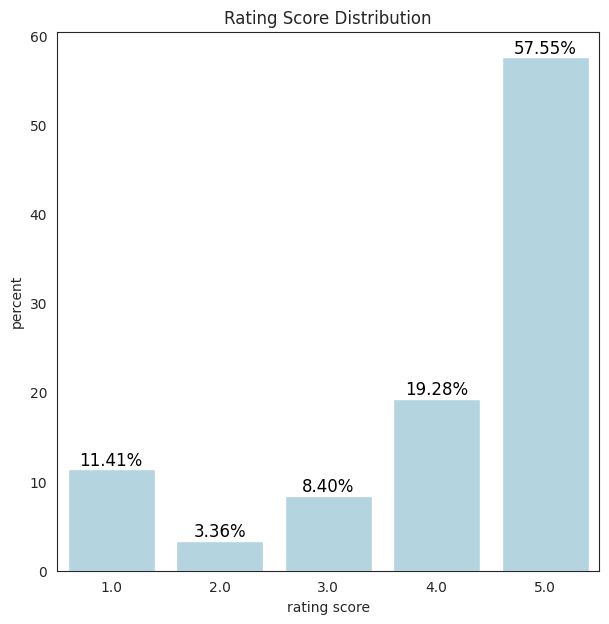

In [ ]:
plt.figure(figsize=(7,7))
sns.set_style("white")
ax=sns.barplot(data=review_score_distribution, y="percent",x="index",color="lightblue")
# Add value labels to each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '{:.2f}%'.format(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.xlabel("rating score")   
plt.title("Rating Score Distribution")
plt.show()

In [ ]:
# define 2 groups, rating_score = 5, 5-star, 2nd one is rating score < 5, Lower (need some improvement), the rest is Nan 

delivered_order["score_rating"] = delivered_order["review_score"].apply ( lambda x: "5-star" if x ==5 else "Lower" if 1 <= x and x <5 else "None" )
delivered_order = delivered_order[delivered_order["score_rating"] != "None"]

### **2.3.3 Customers order frequency**

In [ ]:
#Customer order frequency
count = delivered_order.customer_unique_id.value_counts().reset_index()
count = count.groupby("customer_unique_id")["index"].count()/delivered_order.shape[0]
count

customer_unique_id
1     0.742982
2     0.079675
3     0.014837
4     0.005611
5     0.002215
6     0.001684
7     0.000403
8     0.000137
9     0.000092
10    0.000101
11    0.000092
12    0.000082
13    0.000018
14    0.000027
15    0.000027
18    0.000009
20    0.000009
21    0.000009
24    0.000009
Name: index, dtype: float64

There are nearly 75% of customers order only 1 time from 2016 to 2018. It would be hard to analyze the customer's shopping habits to optimize customers experiment in the future. 

In [ ]:
#Number of items in each order
item_count = delivered_order.order_id.value_counts().reset_index()
item_count = item_count.groupby("order_id")["index"].count().reset_index()
item_count.columns = ["number_of_items","count"]
item_count['percent'] = item_count["count"] / item_count["count"].sum()
item_count

,number_of_items,count,percent
0,1,86205,0.900530
1,2,7315,0.076415
2,3,1284,0.013413
3,4,487,0.005087
4,5,193,0.002016
5,6,186,0.001943
6,7,22,0.000230
7,8,8,0.000084
8,9,3,0.000031
9,10,8,0.000084


There are 90% order with only 1 item and 7% order with 2 items. Most of customers ordered only 1 product. We can improve our system, such as product suggestion, or buy a bundle with attractive price that would increase the number of sale and number of product per order.

In [ ]:
delivered_order.groupby("score_rating")["shipping_distance"].mean()

score_rating
5-star    571.892982
Lower     637.197852
Name: shipping_distance, dtype: float64

# 3 Analysis


## **3.1  Comparison between two score rating groups**

We will compare the data of two score rating groups - 5-star score rating and Lower score rating - including: 

*   Delivery duration from purchase order to receive feedback from customer
*   Late status affected on rating score






In [ ]:
#Drop duplicated order_id
unique_order = delivered_order.drop_duplicates(subset="order_id", keep="first")

In [ ]:
#Extract file to google drive for visualizaion
unique_order.to_csv('/content/gdrive/MyDrive/DataScience Final Project/unique_order.csv')

In [ ]:
unique_order["score_rating"].value_counts()

5-star    56683
Lower     39044
Name: score_rating, dtype: int64

#### 3.1.1 Compare 5-star and Lower rating on order lead time

In [ ]:
grouped_mean = unique_order.groupby("score_rating")[["confirmed_order", "shipping_limit","processing_time","estimated_delivery","actual_delivery","send_survey","submit_review"]].mean().reset_index()
grouped_mean

,score_rating,confirmed_order,shipping_limit,processing_time,estimated_delivery,actual_delivery,send_survey,submit_review
0,5-star,9.928234,6.050235,2.466346,22.955726,10.268113,6.113489,3.204707
1,Lower,10.576184,6.270292,3.275263,23.828462,14.741934,-23.058979,3.067326


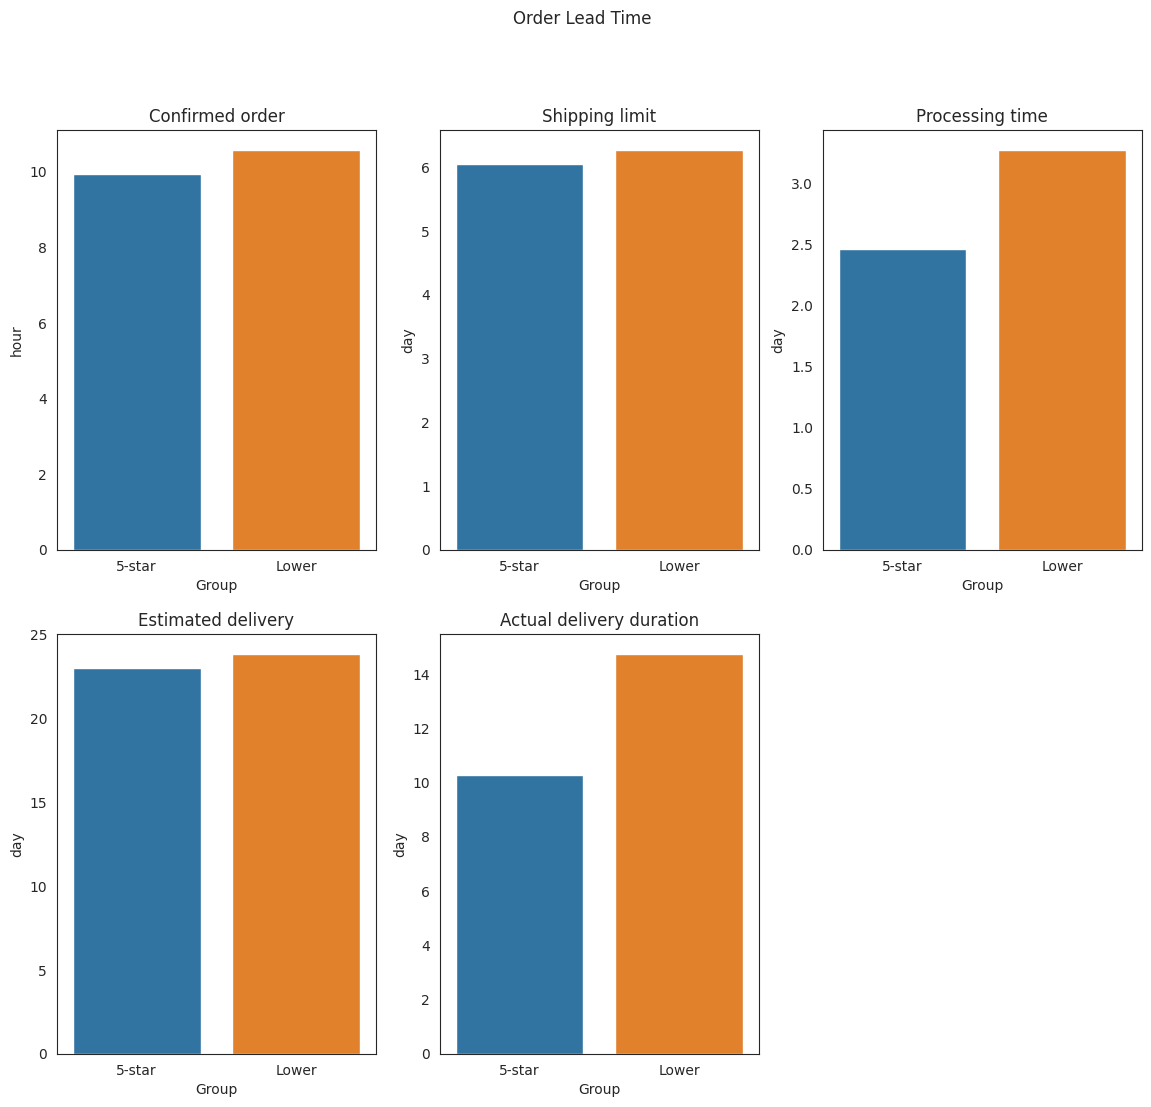

In [ ]:
fig = plt.figure(figsize=(14,12))
sns.set_style("white")
plt.suptitle("Order Lead Time")
plt.subplot(231)
sns.barplot(data=grouped_mean, x="score_rating",y ="confirmed_order")
plt.ylabel("hour")
plt.title("Confirmed order")
plt.xlabel("Group")

plt.subplot(232)
sns.barplot(data=grouped_mean, x="score_rating",y ="shipping_limit")
plt.ylabel("day")
plt.title("Shipping limit")
plt.xlabel("Group")

plt.subplot(233)
sns.barplot(data=grouped_mean, x="score_rating",y ="processing_time")
plt.ylabel("day")
plt.xlabel("Group")
plt.title("Processing time")

plt.subplot(234)
sns.barplot(data=grouped_mean, x="score_rating",y ="estimated_delivery")
plt.ylabel("day")
plt.xlabel("Group")
plt.title("Estimated delivery")

plt.subplot(235)
sns.barplot(data=grouped_mean, x="score_rating",y ="actual_delivery")
plt.ylabel("day")
plt.xlabel("Group")
plt.title("Actual delivery duration")


plt.show()



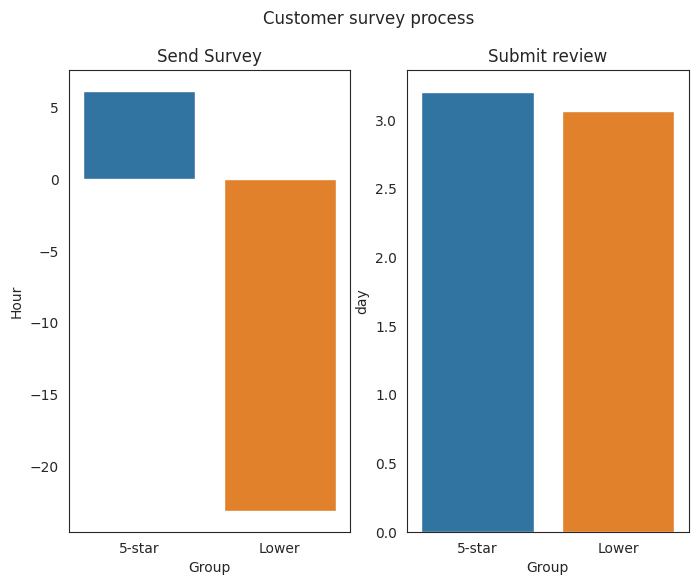

In [ ]:
# Send survey process
plt.figure(figsize=(8,6))
sns.set_style("white")
plt.suptitle("Customer survey process")
plt.subplot(121)
sns.barplot(data=grouped_mean, x="score_rating",y ="send_survey")
plt.ylabel("Hour")
plt.xlabel("Group")
plt.title("Send Survey")

plt.subplot(122)
sns.barplot(data=grouped_mean, x="score_rating",y ="submit_review")
plt.ylabel("day")
plt.xlabel("Group")
plt.title("Submit review")
plt.show()

As we can see the 5-star rating group has some positive points compare to Lower group, including less confirmed order time, less shipping duration, less processing duration, and actual delivery is more efficient. Beside that, the time sending product survey to customers also affected on customer experience Time to send survey is important. With 5-star group, the average time when sellers send survey to customers was 5 hours after the order delivered. We will get exact timeline sending survey. However, the data just show the date to send survey only, not the actual time. We may need further study to manage time sending survey. 

In [ ]:
# We find out when sellers send survey to customers to get their feedback 
send_survey_time = unique_order[unique_order["score_rating"] == "5-star"]["send_survey_time"].value_counts(normalize=True).reset_index()
send_survey_time["percent"]=send_survey_time["send_survey_time"]*100
send_survey_time

,index,send_survey_time,percent
0,within a day,0.564208,56.420796
1,within a few hours,0.326306,32.630595
2,within an hour,0.085616,8.561650
3,a few days or more,0.023870,2.386959


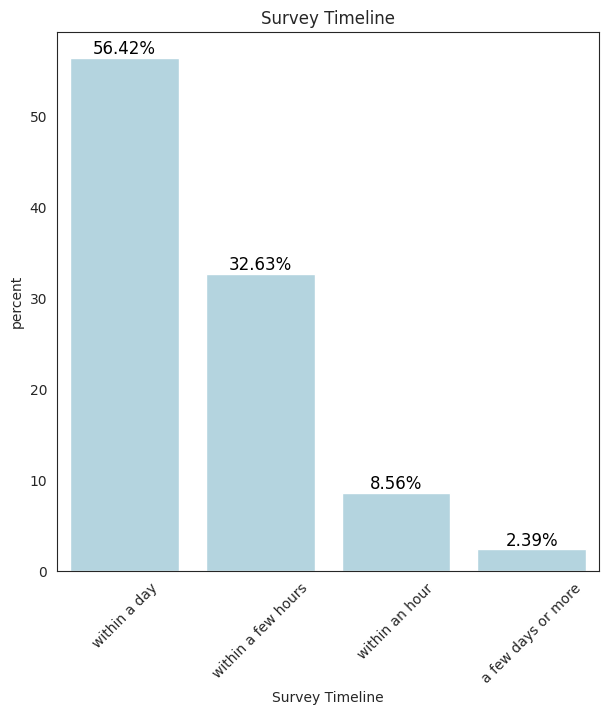

In [ ]:
plt.figure(figsize=(7,7))
sns.set_style("white")
ax=sns.barplot(data=send_survey_time, x="index",y ="percent", color="lightblue")
plt.xlabel("Survey Timeline")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '{:.2f}%'.format(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title("Survey Timeline")
plt.show()

Most of feedbacks were sent to customers within a day. 56% of customers received survey form after 5 hours of delivery. The survey sending time depended on type of products, delivery quality, quality of products, time delivery and so on. Some products may take more time to get the reviews.

In [ ]:
#Order confirmation time comparison
score_rating_top=unique_order[unique_order["score_rating"]=="5-star"]["confirmed_order_duration"].value_counts(normalize=True)
score_rating_low=unique_order[unique_order["score_rating"]=="Lower"]["confirmed_order_duration"].value_counts(normalize=True)

Text(0.5, 0, ' ')

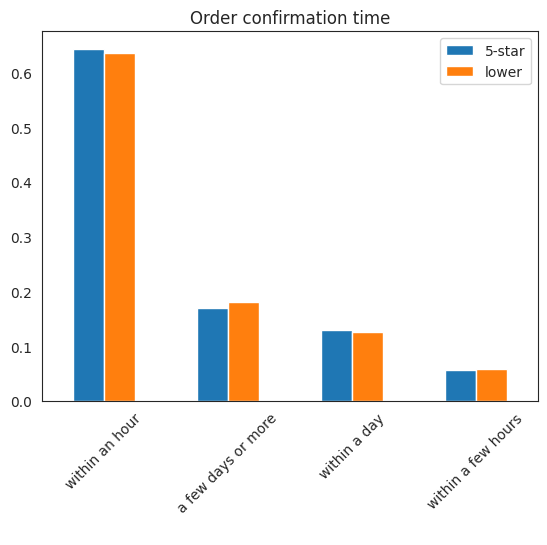

In [ ]:
df= pd.DataFrame({"5-star":score_rating_top,"lower":score_rating_low})
sns.set_style("white")
df.plot(kind="bar",rot=45)
plt.title("Order confirmation time")
plt.xlabel(" ")

There are not a big difference of order confirmation time between two groups on Olist. 80% total of orders were approved within a day. However, about 20% of orders on Olist took a fews day or more for order approval. The order approval duration depends on payment methods. We will find out the reason of long duration order approval. 

In [ ]:
payment_type=unique_order["payment_type"].value_counts(normalize=True).reset_index()
payment_type["percentage"] = payment_type["payment_type"]*100
payment_type

,index,payment_type,percentage
0,credit_card,0.759125,75.912500
1,boleto,0.198807,19.880701
2,voucher,0.026712,2.671166
3,debit_card,0.015356,1.535633


In [ ]:
payment_duration=unique_order.groupby("payment_type")["confirmed_order"].mean().reset_index()
payment_duration

,payment_type,confirmed_order
0,boleto,32.885441
1,credit_card,4.358400
2,debit_card,8.141181
3,voucher,8.280033


In [ ]:
payment=pd.merge(payment_type[["index","percentage"]], payment_duration, left_on ="index", right_on="payment_type")
payment

,index,percentage,payment_type,confirmed_order
0,credit_card,75.912500,credit_card,4.358400
1,boleto,19.880701,boleto,32.885441
2,voucher,2.671166,voucher,8.280033
3,debit_card,1.535633,debit_card,8.141181


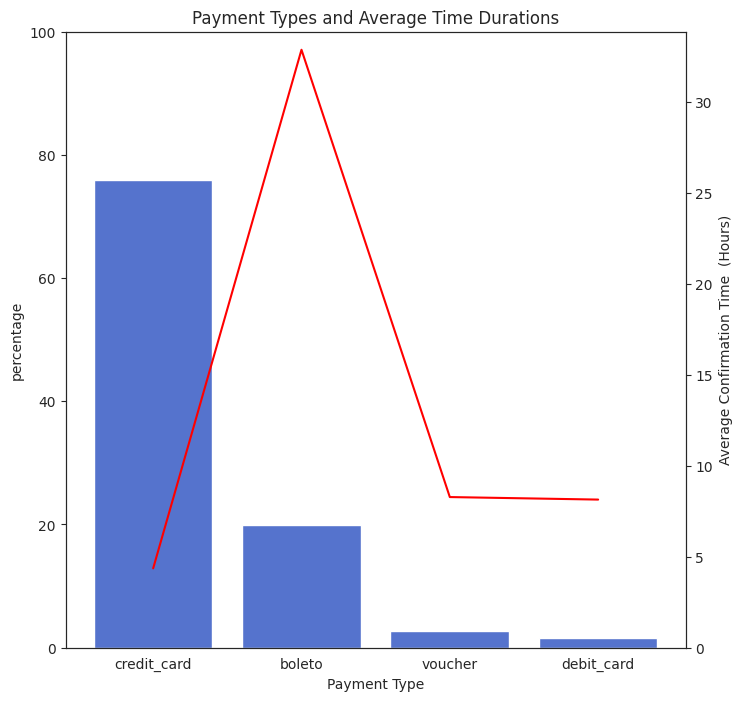

In [ ]:
plt.figure(figsize=(8, 8))
sns.set_style("white")
plt.title("Payment Types and Average Time Durations")
ax1=sns.barplot(data=payment, x="index",y="percentage",color="royalblue")
ax1.set_xlabel("Payment Type")
ax1.set_ylabel("percentage")
ax2=ax1.twinx()
ax2=sns.lineplot(data=payment, x="index", y="confirmed_order",ax=ax2, color="red")
ax2.set_ylabel("Average Confirmation Time  (Hours)")
ax1.set_ylim([0, 100])
ax2.set_ylim([0, payment_duration["confirmed_order"].max() + 1])
plt.show()

Credit card is the most payment method in Brazil with 75%. It takes about 4 and a half hours to approve order. Boleto is the second most popular one with 20%,however this payment method would take about 33 hours to order approval. The reason for late order approval because of the transaction process. Boleto customers receive a voucher stating the amount to pay for services or goods. The payment would take a couple of days from deposit to receive and confirmation.

source: https://stripe.com/docs/payments/boleto#:~:text=Boleto%20is%20an%20official%20

### 3.1.2 Shipment status comparison

In [ ]:
#Define order status, including "On time" which was delivered orders before the estimated delivery time and "Late" which was delivered orders after the estimated delivery time:
unique_order["shipment_status"] = np.where(unique_order["delivery_diff"] > 0, "Late", "On time")

In [ ]:
shipment_status = unique_order.shipment_status.value_counts().reset_index()
shipment_status

,index,shipment_status
0,On time,88079
1,Late,7648


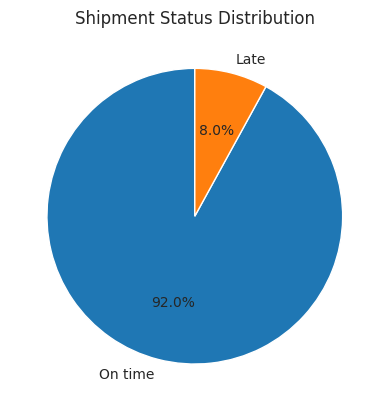

In [ ]:
labels = ['On time','Late']
sizes = [88079, 7648]
#colors = ['#ff9999', '#66b3ff']

# Plot
plt.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90)

# Title
plt.title('Shipment Status Distribution')

# Show plot
plt.show()

In [ ]:
#check rating score related to shipment status
late_shipment=unique_order[unique_order["shipment_status"]=="Late"]["score_rating"].value_counts().reset_index()
late_shipment

,index,score_rating
0,Lower,5952
1,5-star,1696


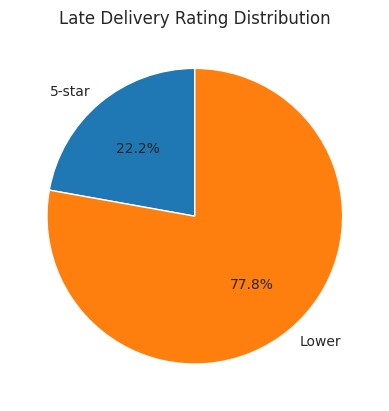

In [ ]:
labels = ['5-star','Lower']
sizes = [1696, 5952]
#colors = ['#ff9999', '#66b3ff']

# Plot
plt.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90)

# Title
plt.title('Late Delivery Rating Distribution')

# Show plot
plt.show()

In nearly 8000 Late shipment order, there are 77.8% of orders are lower score rating which means late shipping would lead to lower customer satisfaction in terms of score rating. 

In [ ]:
# compare the rating score of late shipment status 
late_delivery = unique_order[unique_order["shipment_status"]=="Late"]

In [ ]:
def late_time(row):
  if row["delivery_diff"] <= 1 :
    return "Less than a day"
  elif row["delivery_diff"] <= 3 :
    return "Less than 3 day"
  elif row["delivery_diff"] <= 7 :
    return "Less than a week"
  elif row["delivery_diff"] <= 21 :
    return "Less than three weeks"
  else:
    return "More than three weeks"

late_delivery["late_duration"]=late_delivery.apply(late_time, axis=1)

In [ ]:
late_delivery_duration=late_delivery.groupby("late_duration")["review_score"].mean().reset_index()
late_delivery_duration = late_delivery_duration.sort_values(ascending=False, by="review_score")
late_delivery_duration

,late_duration,review_score
1,Less than a day,4.031323
0,Less than 3 day,3.511817
2,Less than a week,2.312429
4,More than three weeks,1.760841
3,Less than three weeks,1.717216


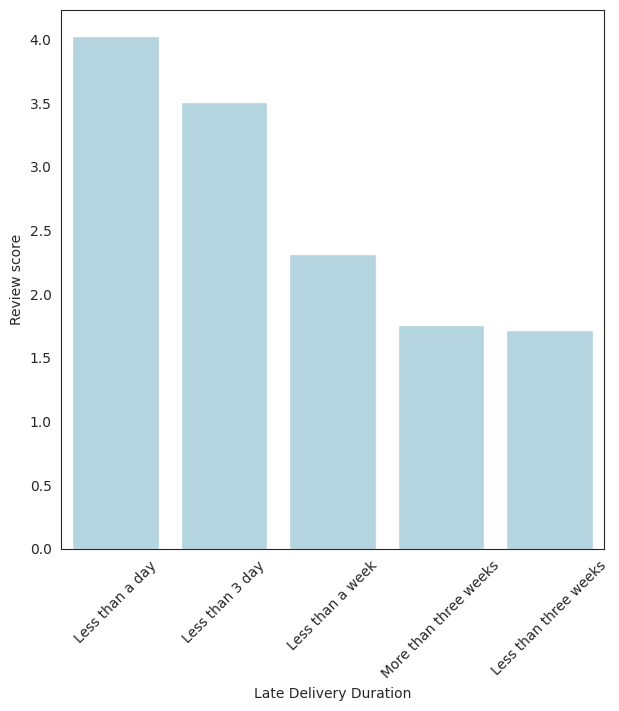

In [ ]:
plt.figure(figsize=(7,7))
sns.set_style("white")
ax=sns.barplot(data=late_delivery_duration, x="late_duration",y ="review_score", color="lightblue")
plt.xlabel("Late Delivery Duration")
plt.ylabel("Review score")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

Sellers should deliver orders on time or no later than one day to get at least 4 out of 5 review score. 

### 3.1.3 Product category comparison 

In [ ]:
# Top product category on Olist
top_category=unique_order["product_category"].value_counts().reset_index().head(15)
top_category

,index,product_category
0,bed_bath_table,9065
1,health_beauty,8552
2,sports_leisure,7440
3,computers_accessories,6467
4,furniture_decor,6160
5,housewares,5649
6,watches_gifts,5426
7,telephony,4047
8,auto,3770
9,toys,3745


In [ ]:
#we filter top product categories with lowest review score on Olist with at least 20 review score rating  
lowest_category=unique_order[unique_order["score_rating"]=="Lower"].groupby("product_category")["review_score"].agg(["count","mean"]).sort_values(by='mean')
lowest_category= lowest_category[lowest_category["count"]>20].reset_index()[:10]
lowest_category

,product_category,count,mean
0,fashion_male_clothing,48,2.416667
1,audio,159,2.522013
2,home_confort,169,2.644970
3,office_furniture,737,2.740841
4,fixed_telephony,99,2.818182
5,construction_tools_safety,69,2.826087
6,furniture_decor,2628,2.828387
7,bed_bath_table,4147,2.838920
8,dvds_blu_ray,21,2.857143
9,baby,1127,2.865129


In [ ]:
top_star_category=unique_order[unique_order["score_rating"]=="5-star"].groupby("product_category")["review_score"].count().sort_values(ascending=False)[:10].reset_index()
top_star_category

,product_category,review_score
0,health_beauty,5357
1,bed_bath_table,4918
2,sports_leisure,4600
3,computers_accessories,3672
4,furniture_decor,3532
5,housewares,3417
6,watches_gifts,3183
7,toys,2363
8,auto,2195
9,telephony,2183


In [ ]:
df=pd.concat([top_category["index"],lowest_category["product_category"],top_star_category["product_category"]],axis=1)
df.columns=("top_category","lowest_rating_category","top_rating_category")
df

,top_category,lowest_rating_category,top_rating_category
0,bed_bath_table,fashion_male_clothing,health_beauty
1,health_beauty,audio,bed_bath_table
2,sports_leisure,home_confort,sports_leisure
3,computers_accessories,office_furniture,computers_accessories
4,furniture_decor,fixed_telephony,furniture_decor
5,housewares,construction_tools_safety,housewares
6,watches_gifts,furniture_decor,watches_gifts
7,telephony,bed_bath_table,toys
8,auto,dvds_blu_ray,auto
9,toys,baby,telephony


As we can see,  there are some top category group with high rating score including: healty beauty, sports leisure,computers accessories, housewares, watches gifts, telephony, auto and toys. We should consider these product categories when starting a shop on Olist to achieve high score rating. We will find out mean and median price of these product categories

In [ ]:
# Compare price of each suggested catergory in three groups: general, 5-star, !=5-star
product_category_suggestion=unique_order[unique_order["score_rating"]=="5-star"].groupby("product_category").agg({"price":["count","mean","median","min","max"]})

In [ ]:
product_category_suggestion=unique_order[unique_order["score_rating"]!="5-star"].groupby("product_category").agg({"price":["count","mean","median","min","max"]})

In [ ]:
product_category_suggestion=unique_order.groupby("product_category")["price"].mean()
product_category_suggestion = product_category_suggestion.loc[["health_beauty","sports_leisure","computers_accessories","housewares","watches_gifts","telephony","auto","toys"]].reset_index()
product_category_suggestion

,product_category,price
0,health_beauty,135.627327
1,sports_leisure,117.662468
2,computers_accessories,116.757591
3,housewares,95.947042
4,watches_gifts,206.484088
5,telephony,70.755285
6,auto,141.237822
7,toys,119.532889


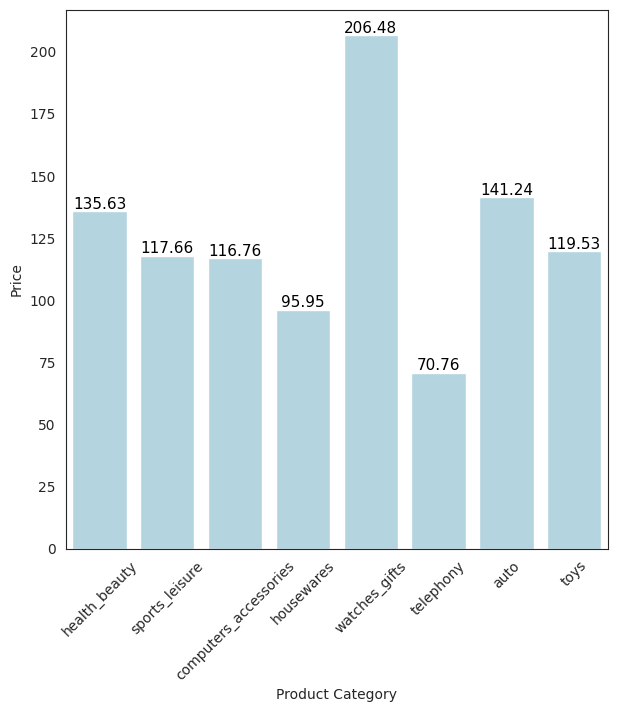

In [ ]:
plt.figure(figsize=(7,7))
ax = sns.barplot(data=product_category_suggestion, x="product_category",y="price", color="lightblue")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '{:.2f}'.format(p.get_height()), 
            fontsize=11, color='black', ha='center', va='bottom')
plt.xlabel("Product Category")
plt.ylabel("Price")
plt.show()

As new sellers on Olist, sellers can consider product categories such as health beauty, sport leisure, computer accessories. They should also consider the average price of these product categories to find out the suitable price for their products. 

In [ ]:
#top 10 products of "health beauty"( product price is a single price (per unit), with 1 product_id we have different prices therefore we use mean price)
unique_order[unique_order["product_category"]=="health_beauty"].groupby("product_id").agg(product_id_count=("product_id", "count"), price_mean=("price", "mean")).reset_index().sort_values(by="product_id_count", ascending=False)[:10]


,product_id,product_id_count,price_mean
201,154e7e31ebfa092203795c972e5804a6,258,22.517132
398,2b4609f8948be18874494203496bc318,253,87.380593
1128,7c1bd920dbdf22470b68bde975dd3ccf,208,59.937115
1692,bb50f2e236e5eea0100680137654686c,185,327.513514
249,19c91ef95d509ea33eda93495c4d3481,151,121.182053
976,6cdd53843498f92890544667809f1595,146,350.512329
571,3fbc0ef745950c7932d5f2a446189725,140,65.690000
600,437c05a395e9e47f9762e677a7068ce7,137,49.993723
2048,e0cf79767c5b016251fe139915c59a26,124,29.900000
672,4c2394abfbac7ff59ec7a420918562fa,115,84.990000


## 3.2 Affecting time on customter experience 

Customer shopping experience depends on the times of day, day of week, and month of the year 

### 3.2.1 Customer purchase time and customer feedback time

In [ ]:
a=unique_order.groupby("order_purchase_time").size().reset_index()
a.columns=["hour","count"]
b=unique_order.groupby("order_feedback_time").size().reset_index()
b.columns=["hour","count"]

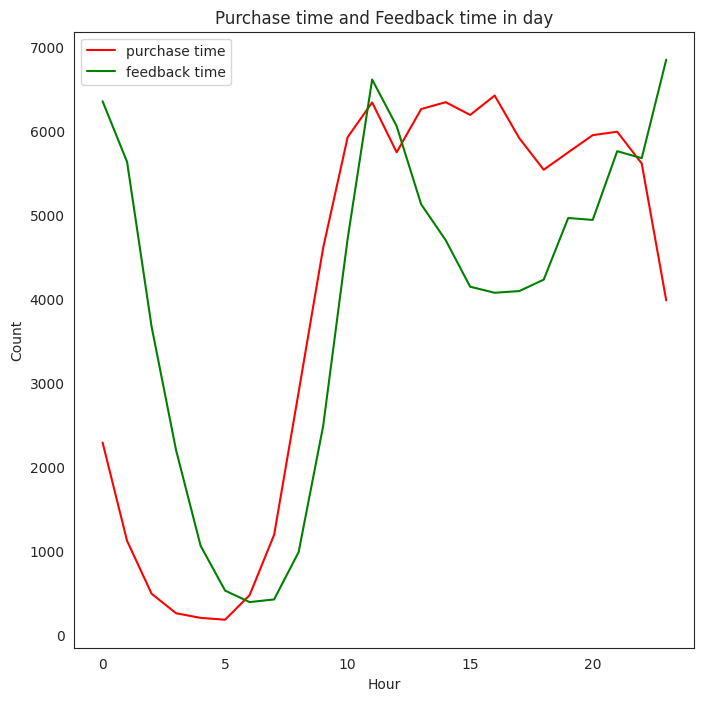

In [ ]:
plt.figure(figsize=(8,8))
sns.lineplot(data=a, x="hour",y="count", color="r",label = "purchase time")
sns.lineplot(data=b, x="hour",y="count",color ="g",label ="feedback time")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Purchase time and Feedback time in day")
plt.show()

Number of orders increase gradually in the morning, the peak number of orders are around 11am and from 2pm to 4pm. The number of orders reduce at 12am and 6pm and significantly decrease at midnight and early morning. The number of feedbacks are similar as purchase time. Customers often write the review around 10am and after 8pm. As I mentioned above, Olist didn't use the actual sending survey time(day only). Therefore, sellers can consider send the feedback form to customer around 8 to 10 in the morning and 7 to 9 at night to attract customers. Besides that, for advertising, sale or any events, sellers can choose morning time and early afternoon to raise more attraction of customers.

### 3.2.2 Order by day, month

In [ ]:
unique_order['order_month_year'] = pd.to_datetime(unique_order['purchase_time']).dt.to_period('M')

In [ ]:
unique_order['day_of_week'] = pd.to_datetime(unique_order['purchase_time']).dt.dayofweek

In [ ]:
rating_year_month = unique_order.groupby(["order_month_year","score_rating"]).size().reset_index()
rating_year_month.columns=("Month","score_rating","count")
rating_year_month=rating_year_month.set_index("Month")
rating_year_month=rating_year_month.iloc[3:]
rating_year_month=rating_year_month.reset_index()
rating_year_month

,Month,score_rating,count
0,2016-12,5-star,1
1,2017-01,5-star,454
2,2017-01,Lower,287
3,2017-02,5-star,981
4,2017-02,Lower,661
5,2017-03,5-star,1486
6,2017-03,Lower,1038
7,2017-04,5-star,1314
8,2017-04,Lower,976
9,2017-05,5-star,2125


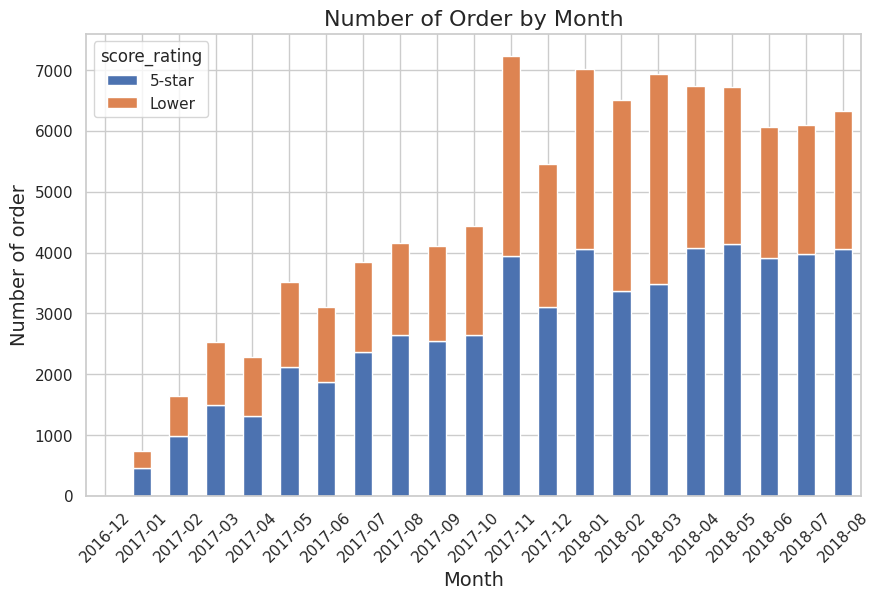

In [ ]:
# Create a pivot table to aggregate scores by day_name and score_rating
pivot_table = rating_year_month.pivot_table(index='Month', columns='score_rating', values='count', aggfunc='sum')

# Create a stacked bar chart using Seaborn
sns.set(style="whitegrid")
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_title('Number of Order by Month', fontsize=16)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Number of order', fontsize=14)
plt.xticks(rotation=45)

plt.show()


In [ ]:
#number of late order per months
late_order_year_month = unique_order.groupby(["order_month_year","shipment_status"]).size().reset_index()
late_order_year_month.columns=("Month","shipment_status","count")
late_order_year_month=late_order_year_month.set_index("Month")
late_order_year_month=late_order_year_month.iloc[3:]
late_order_year_month=late_order_year_month.reset_index()
late_order_year_month=late_order_year_month[late_order_year_month["shipment_status"]=="Late"]
late_order_year_month

,Month,shipment_status,count
1,2017-01,Late,22
3,2017-02,Late,46
5,2017-03,Late,137
7,2017-04,Late,177
9,2017-05,Late,121
11,2017-06,Late,118
13,2017-07,Late,129
15,2017-08,Late,137
17,2017-09,Late,211
19,2017-10,Late,228


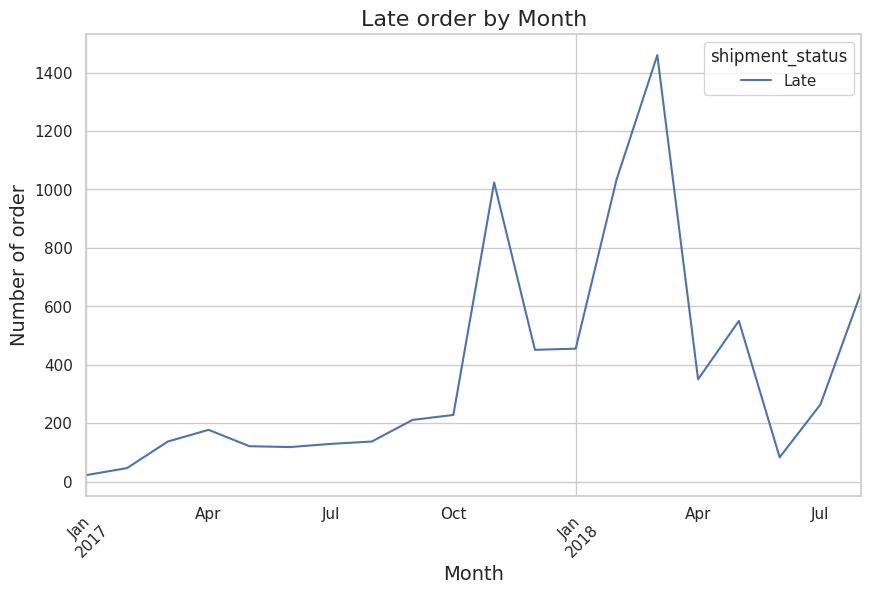

In [ ]:
# Create a pivot table to aggregate scores by day_name and score_rating
pivot_table = late_order_year_month.pivot_table(index='Month', columns='shipment_status', values='count')

# Create a stacked bar chart using Seaborn
sns.set(style="whitegrid")
ax = pivot_table.plot(kind='line', figsize=(10, 6))
ax.set_title('Late order by Month', fontsize=16)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Number of order', fontsize=14)
plt.xticks(rotation=45)

plt.show()

The data is from late of 2016 to July of 2018, as we can see in months with lower order, the ratio of 5-star/lower rating score is less than these months with high volumn of orders. From 11/2017 to 03/2018 the number of lower rating score orders increased with the higher number of orders. This is also explained by the number of late order from 11/2017 to 03/2018 increased significantly. Therefore, Olist can consider to hire more employees or improve delivery system to adopt the raising of orders during this time. 

In [ ]:
# Number of order with rating score by day of a week. 
day_of_week = unique_order.groupby(["day_of_week","score_rating"]).size().reset_index()
day_of_week.columns=("day_of_week","score_rating","count")
day_of_week

,day_of_week,score_rating,count
0,0,5-star,9362
1,0,Lower,6193
2,1,5-star,9183
3,1,Lower,6213
4,2,5-star,8986
5,2,Lower,5973
6,3,5-star,8400
7,3,Lower,5825
8,4,5-star,7799
9,4,Lower,5782


In [ ]:
#late order by Day
Late_order_day_of_week = unique_order.groupby(["day_of_week","shipment_status"]).size().reset_index()
Late_order_day_of_week.columns=("day_of_week","shipment_status","count")
Late_order_day_of_week = Late_order_day_of_week[Late_order_day_of_week["shipment_status"]=="Late"]
Late_order_day_of_week

,day_of_week,shipment_status,count
0,0,Late,1376
2,1,Late,1294
4,2,Late,1148
6,3,Late,1056
8,4,Late,1132
10,5,Late,779
12,6,Late,863


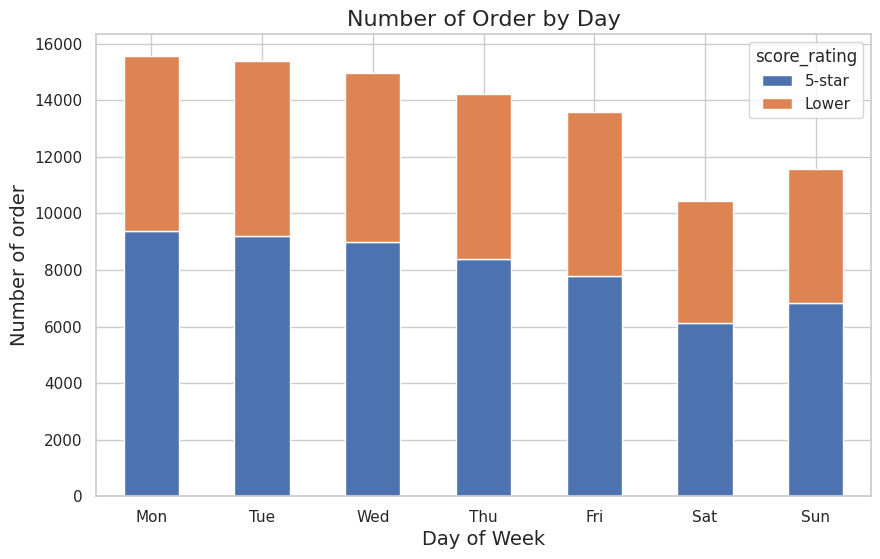

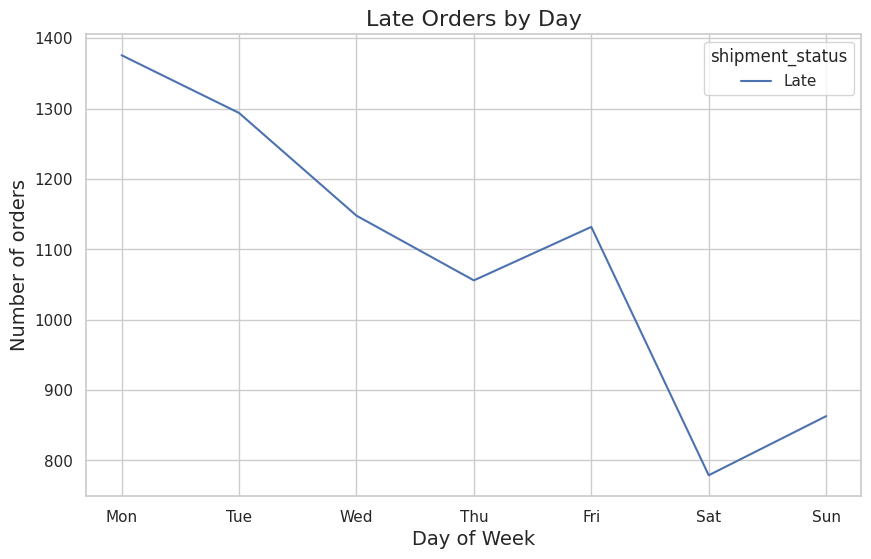

In [ ]:


# Map day_of_week column to the actual day name
day_of_week['day_name'] = day_of_week['day_of_week'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 
                                        3: 'Thursday', 4: 'Friday', 5: 'Saturday', 
                                        6: 'Sunday'})

# Create a pivot table to aggregate scores by day_name and score_rating
pivot_table_1 = day_of_week.pivot_table(index='day_of_week', columns='score_rating', values='count', aggfunc='sum')
pivot_table_2 = Late_order_day_of_week.pivot_table(index='day_of_week', columns='shipment_status', values='count')

# Create a stacked bar chart using Seaborn

sns.set(style="whitegrid")
ax1 = pivot_table_1.plot(kind='bar', stacked=True, figsize=(10, 6))
ax1.set_title('Number of Order by Day', fontsize=16)
ax1.set_xlabel('Day of Week', fontsize=14)
ax1.set_ylabel('Number of order', fontsize=14)
plt.xticks(rotation=0)
plt.xticks(ticks=range(0,7),labels=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
ax2 = pivot_table_2.plot(kind='line', figsize=(10, 6))
ax2.set_title('Late Orders by Day', fontsize=16)
ax2.set_xlabel('Day of Week', fontsize=14)
ax2.set_ylabel('Number of orders', fontsize=14)
ax2.set_xticks(range(7))
ax2.set_xticklabels(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])

plt.show()

As we can see, the number of order is gradually reduce from Monday to Saturday, before going up litle bit on Sunday. At the same time, the late order is also decrease from Monday to Thursday and minimum late orders were on Saturday. To improve it, Olist should manage order better on weekdays, especially on Monday morning. 

### 3.2.3 Shipping distance between State



In [ ]:
#define two groups with 5-star score rating and lower score rating
low_unique_order = unique_order[unique_order["score_rating"]=="Lower"]
high_unique_order = unique_order[unique_order["score_rating"]=="5-star"]

In [ ]:
# Top 10 seller_state and customer_state with the highest number of order of lower group
lower_group = low_unique_order.groupby(["seller_state",'customer_state']).agg({"order_id":"count","shipping_distance": "mean","actual_delivery":"mean","freight_value":"mean"}).sort_values(by="order_id",ascending=False).reset_index()[:10]
lower_group["freight_value/shipping_distance"]= lower_group["freight_value"]/lower_group["shipping_distance"]
lower_group["shipping_index"]= lower_group["shipping_distance"]/lower_group["actual_delivery"]
lower_group

,seller_state,customer_state,order_id,shipping_distance,actual_delivery,freight_value,freight_value/shipping_distance,shipping_index
0,SP,SP,11598,153.574346,9.043340,13.624435,0.088716,16.982038
1,SP,RJ,3710,444.119307,20.290205,20.896288,0.047051,21.888360
2,SP,MG,3078,497.263720,13.756713,20.508080,0.041242,36.146986
3,SP,RS,1550,903.804238,18.102053,21.104323,0.023351,49.928273
4,SP,PR,1249,475.876691,13.866477,20.490120,0.043058,34.318499
5,SP,BA,1177,1393.978891,21.415268,24.501674,0.017577,65.092760
6,PR,SP,1104,487.900654,12.668475,19.163913,0.039278,38.512974
7,SP,SC,1048,568.229653,18.013642,20.056851,0.035297,31.544407
8,MG,SP,997,415.784839,11.998969,21.690682,0.052168,34.651714
9,SP,ES,652,786.648200,17.583982,20.814724,0.026460,44.736635


In [ ]:
# Top 10 seller_state and customer_state with the highest number of order of 5-star group
high_group= high_unique_order.groupby(["seller_state",'customer_state']).agg({"order_id":"count","shipping_distance": "mean","actual_delivery":"mean","freight_value":"mean"}).sort_values(by="order_id",ascending=False).reset_index()[:10]
high_group["freight_value/shipping_distance"]= high_group["freight_value"]/high_group["shipping_distance"]
high_group["shipping_index"]= high_group["shipping_distance"]/high_group["actual_delivery"]
high_group

,seller_state,customer_state,order_id,shipping_distance,actual_delivery,freight_value,freight_value/shipping_distance,shipping_index
0,SP,SP,18903,148.789215,6.623359,13.049937,0.087708,22.464315
1,SP,RJ,4350,439.685690,12.018578,20.010455,0.045511,36.583837
2,SP,MG,4305,492.269417,10.572963,20.230915,0.041097,46.559266
3,SP,RS,2033,906.701646,13.779150,20.531003,0.022644,65.802437
4,SP,PR,1850,460.983681,11.193208,20.119854,0.043645,41.184231
5,PR,SP,1800,458.877593,9.579246,20.019628,0.043627,47.903313
6,MG,SP,1538,415.084567,9.542510,21.140663,0.050931,43.498470
7,SP,SC,1259,554.200562,13.044011,21.766521,0.039276,42.486973
8,SP,BA,1113,1379.319950,16.959838,23.470719,0.017016,81.328606
9,MG,MG,998,261.667778,7.558360,17.271513,0.066006,34.619652


In [ ]:
# Merge two table of lower and 5-star rating 
merged_df = pd.merge(lower_group, high_group, on=['seller_state', 'customer_state'])
merged_df

,seller_state,customer_state,order_id_x,shipping_distance_x,actual_delivery_x,freight_value_x,freight_value/shipping_distance_x,shipping_index_x,order_id_y,shipping_distance_y,actual_delivery_y,freight_value_y,freight_value/shipping_distance_y,shipping_index_y
0,SP,SP,11598,153.574346,9.043340,13.624435,0.088716,16.982038,18903,148.789215,6.623359,13.049937,0.087708,22.464315
1,SP,RJ,3710,444.119307,20.290205,20.896288,0.047051,21.888360,4350,439.685690,12.018578,20.010455,0.045511,36.583837
2,SP,MG,3078,497.263720,13.756713,20.508080,0.041242,36.146986,4305,492.269417,10.572963,20.230915,0.041097,46.559266
3,SP,RS,1550,903.804238,18.102053,21.104323,0.023351,49.928273,2033,906.701646,13.779150,20.531003,0.022644,65.802437
4,SP,PR,1249,475.876691,13.866477,20.490120,0.043058,34.318499,1850,460.983681,11.193208,20.119854,0.043645,41.184231
5,SP,BA,1177,1393.978891,21.415268,24.501674,0.017577,65.092760,1113,1379.319950,16.959838,23.470719,0.017016,81.328606
6,PR,SP,1104,487.900654,12.668475,19.163913,0.039278,38.512974,1800,458.877593,9.579246,20.019628,0.043627,47.903313
7,SP,SC,1048,568.229653,18.013642,20.056851,0.035297,31.544407,1259,554.200562,13.044011,21.766521,0.039276,42.486973
8,MG,SP,997,415.784839,11.998969,21.690682,0.052168,34.651714,1538,415.084567,9.542510,21.140663,0.050931,43.498470


In [ ]:
comparison_distance=merged_df[["seller_state","customer_state","freight_value/shipping_distance_x","shipping_index_x","freight_value/shipping_distance_y","shipping_index_y"]]
comparison_distance.columns=(["seller_state","customer_state","low_freight_value","low_shipping_index","high_freight_value","high_shipping_index"])
comparison_distance["seller_customer"]=comparison_distance["seller_state"]+comparison_distance["customer_state"]
comparison_distance

,seller_state,customer_state,low_freight_value,low_shipping_index,high_freight_value,high_shipping_index,seller_customer
0,SP,SP,0.088716,16.982038,0.087708,22.464315,SPSP
1,SP,RJ,0.047051,21.888360,0.045511,36.583837,SPRJ
2,SP,MG,0.041242,36.146986,0.041097,46.559266,SPMG
3,SP,RS,0.023351,49.928273,0.022644,65.802437,SPRS
4,SP,PR,0.043058,34.318499,0.043645,41.184231,SPPR
5,SP,BA,0.017577,65.092760,0.017016,81.328606,SPBA
6,PR,SP,0.039278,38.512974,0.043627,47.903313,PRSP
7,SP,SC,0.035297,31.544407,0.039276,42.486973,SPSC
8,MG,SP,0.052168,34.651714,0.050931,43.498470,MGSP


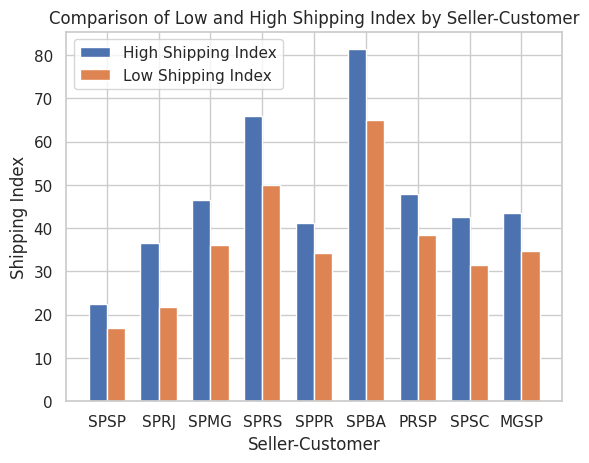

In [ ]:
# Create a list of x values with seller_customer column data
x_values = list(comparison_distance['seller_customer'])

# Create a list of y values with low_shipping_index column data
y_low = list(comparison_distance['low_shipping_index'])

# Create a list of y values with high_shipping_index column data
y_high = list(comparison_distance['high_shipping_index'])

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(x_values))
r2 = [x + bar_width for x in r1]

# Plot the bar chart with x and y_high values
plt.bar(r1, y_high, width=bar_width, label='High Shipping Index')
# Plot the bar chart with x and y_low values
plt.bar(r2, y_low, width=bar_width, label='Low Shipping Index')



# Set the plot title and axis labels
plt.title('Comparison of Low and High Shipping Index by Seller-Customer')
plt.xlabel('Seller-Customer')
plt.ylabel('Shipping Index')

# Set the x-axis tick labels to the seller-customer pairs
plt.xticks([r + bar_width/2 for r in range(len(x_values))], x_values)

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

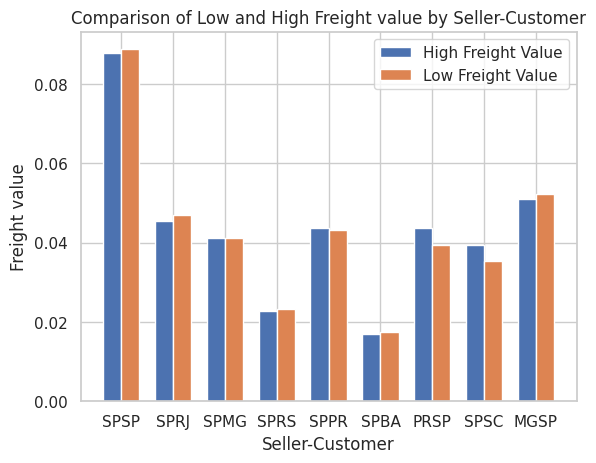

In [ ]:
# Create a list of x values with seller_customer column data
x_values = list(comparison_distance['seller_customer'])

# Create a list of y values with low_shipping_index column data
y_low = list(comparison_distance['low_freight_value'])

# Create a list of y values with high_shipping_index column data
y_high = list(comparison_distance['high_freight_value'])

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(x_values))
r2 = [x + bar_width for x in r1]

# Plot the bar chart with x and y_high values
plt.bar(r1, y_high, width=bar_width, label='High Freight Value')
# Plot the bar chart with x and y_low values
plt.bar(r2, y_low,  width=bar_width, label='Low Freight Value')

# Set the plot title and axis labels
plt.title('Comparison of Low and High Freight value by Seller-Customer')
plt.xlabel('Seller-Customer')
plt.ylabel('Freight value')

# Set the x-axis tick labels to the seller-customer pairs
plt.xticks([r + bar_width/2 for r in range(len(x_values))], x_values)

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

=> freight_value/shipping_distance: delivery fee per km

=> shipping_index = distance/actual time

The higher shipping index is the faster deliver to customer. Therefore, sellers can compute the number of actual delivery days based on distance and the shipping index. With lower rating group, these values are smaller than 5-star rating score. On the other hand, the freight value is the delivery fee per km, the smaller freight_value is better. These values of low group is mostly higher than 5-star group, except SP-PR, PR-SP, and SP-SC. Delivery from Sao Paulo to Paraná and return and Sao Paulo to Santa Catarina. The delivery fee is a bit less however the delivery duration is longer that would be the reason of lower score rating. Therefore, we have to consider how to optimise between delivery duration and delivery fee.  

# 4 Conclusion



*   New sellers can improve their review scores by selecting products to sell and improving the order lead time.  
*   To get more reviews and attract more customers, the sellers would optimize time for a better customer experience 
*   There is some peak time of order on weekdays and some months of the year, Olist needs to consider these special occasions to gain customer experience.




